# GooglePlay Project:

# Group 2


### Name of students:

יאיר עוגן

הוד גיספאן

דניאל חתוכה





<div>
<img src="https://github.com/Yairvedaniel/project1/blob/main/PHOTO-2024-06-05-14-34-50.jpg?raw=true" width="400"/>
</div>



<a id="top"></a>
# Table of Contents
1. [Introduction](#introduction)
2. [Data Cleaning and Preprocessing](#data-cleaning-and-preprocessing)

    2.1 [Checking Values](#checking-Values)
3. [Paid Apps vs Free Apps](#paid-apps-vs-free-apps)

    3.1 [הקשר בין גודל האפליקציה לפופולריות שלה](#הקשר-בין-גודל-האפליקציה-לפופולריות-שלה)

<a id="introduction"></a>
## 1.Introduction:

[back to top](#top)

### information on tha data
We'll work with a dataset, based on [Google Play Store](https://play.google.com/store/apps)

The source of the data file  [here](https://www.kaggle.com/datasets/bhavikjikadara/google-play-store-applications/data)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots



In [2]:
url = 'https://raw.githubusercontent.com/Yairvedaniel/project1/main/googleplaystore_%D7%A4%D7%A8%D7%95%D7%99%D7%A7%D7%98%20%D7%A2%D7%95%D7%92%D7%9F%20%D7%95%D7%93%D7%A0%D7%99%D7%90%D7%9C.csv'
apps = pd.read_csv(url)
apps.head()

Unnamed: 0                                                App  \
0           0     Photo Editor & Candy Camera & Grid & ScrapBook   
1           1                                Coloring book moana   
2           2  U Launcher Lite – FREE Live Cool Themes, Hide ...   
3           3                              Sketch - Draw & Paint   
4           4              Pixel Draw - Number Art Coloring Book   

         Category  Rating Reviews  Size     Installs  Type Price  \
0  ART_AND_DESIGN     4.1     159   19M      10,000+  Free     0   
1  ART_AND_DESIGN     3.9     967   14M     500,000+  Free     0   
2  ART_AND_DESIGN     4.7   87510  8.7M   5,000,000+  Free     0   
3  ART_AND_DESIGN     4.5  215644   25M  50,000,000+  Free     0   
4  ART_AND_DESIGN     4.3     967  2.8M     100,000+  Free     0   

  Content Rating                     Genres Last Updated         Current Ver  \
0       Everyone               Art & Design     7-Jan-18               1.0.0   
1       Everyone  Art & Design;Pretend Play    15-Jan-18               2.0.0   
2       Everyone               Art & Design     1-Aug-18               1.2.4   
3           Teen               Art & Design     8-Jun-18  Varies with device   
4       Everyone    Art & Design;Creativity    20-Jun-18                 1.1   

    Android Ver  
0  4.0.3 and up  
1  4.0.3 and up  
2  4.0.3 and up  
3    4.2 and up  
4    4.4 and up

In [3]:
apps.dtypes

Unnamed: 0          int64
App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [4]:
apps.shape

(10841, 14)

In [5]:
apps.columns

Index(['Unnamed: 0', 'App', 'Category', 'Rating', 'Reviews', 'Size',
       'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated',
       'Current Ver', 'Android Ver'],
      dtype='object')

<a id="data-cleaning-and-preprocessing"></a>
## 2.Data Cleaning and Preprocessing:

[back to top](#top)


הסרת עמודה מיותרת

In [6]:
apps = apps.drop('Unnamed: 0', axis=1)
apps.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

<a id='checking-Values'></a>
#### 2.1 checking values
[back to top](#top)

בדיקת כפילויות

In [7]:
apps.duplicated().sum()

483

In [8]:

apps.drop_duplicates(['App','Size','Installs','Reviews','Rating','Price','Android Ver'], inplace=True)

In [9]:
apps.duplicated().sum()

0

In [10]:
apps.shape

(10350, 13)

In [11]:
missing_data = apps.isnull().sum()
print("Missing data before handling:")
print(missing_data)

Missing data before handling:
App                  0
Category             0
Rating            1465
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64


הסרת שורות בעלות ערכים חסרים בודדים

In [12]:
apps = apps.dropna(subset=['Current Ver'])
apps = apps.dropna(subset=['Android Ver'])
apps = apps.dropna(subset=['Content Rating'])
apps = apps.dropna(subset=['Type'])

In [13]:
apps.shape

(10338, 13)

ישנו ערך קטגורי החוזר על עצמו במקרים רבים בעמודות מספריות. לאחר חשיבה בנוגע לנחיצותו בניתוח הנתונים - החלטנו להמיר אותו ב NaN

In [14]:
apps.replace('Varies with device', np.nan, inplace=True)


הסרת תווים מיוחדים מעמודות מספריות

In [15]:

cols = ['Installs','Price']
chars = ['+',",","$"]
for col in cols:   
    for char in chars:
            apps[col] = apps[col].apply(lambda c: c.replace(char, ''))


In [16]:
def size_to_mb(size):
    if isinstance(size, str):
        if 'M' in size:
            return float(size.replace('M', ''))
        elif 'k' in size:
            return float(size.replace('k', '')) / 1000
    return None

apps.loc[:, 'Size_MB'] = apps['Size'].apply(size_to_mb)

print(apps[['Size', 'Size_MB']].head())


   Size  Size_MB
0   19M     19.0
1   14M     14.0
2  8.7M      8.7
3   25M     25.0
4  2.8M      2.8


In [17]:
apps = apps.drop('Size', axis=1)

In [18]:

# Display the original shape of the dataframe
print("Original dataframe shape:", apps.shape)

# Identify and count missing values in 'Rating'
missing_ratings_before = apps['Rating'].isna().sum()
print(f"Missing values in 'Rating' before conversion: {missing_ratings_before}")

# Ensure only numeric values are in the 'Rating' column, converting others to NaN
apps['Rating'] = pd.to_numeric(apps['Rating'], errors='coerce')

# Check again for unique values after conversion
unique_values_after = apps['Rating'].unique()
print("Unique values in 'Rating' after conversion:", unique_values_after)

# Now drop rows with missing values in 'Rating'
rate_apps = apps.dropna(subset=['Rating'])

# Convert relevant columns to numeric using .loc
rate_apps.loc[:, 'Reviews'] = pd.to_numeric(rate_apps['Reviews'], errors='coerce')
rate_apps.loc[:, 'Price'] = pd.to_numeric(rate_apps['Price'], errors='coerce')
rate_apps.loc[:, 'Rating'] = pd.to_numeric(rate_apps['Rating'], errors='coerce')
rate_apps.loc[:, 'Installs'] = pd.to_numeric(rate_apps['Installs'], errors='coerce')
rate_apps.loc[:, 'Size_MB'] = pd.to_numeric(rate_apps['Size_MB'], errors='coerce')

# Verify the new dataframe size and columns
print("Filtered dataframe shape:", rate_apps.shape)
print("Filtered dataframe columns:", rate_apps.columns)

# Display the first few rows of the new dataframe
rate_apps.head()


Original dataframe shape: (10338, 13)
Missing values in 'Rating' before conversion: 1460
Unique values in 'Rating' after conversion: [4.1 3.9 4.7 4.5 4.3 4.4 3.8 4.2 4.6 4.  nan 4.8 4.9 3.6 3.7 3.2 3.3 3.4
 3.5 3.1 5.  2.6 3.  1.9 2.5 2.8 2.7 1.  2.9 2.3 2.2 1.7 2.  1.8 2.4 1.6
 2.1 1.4 1.5 1.2]
Filtered dataframe shape: (8878, 13)
Filtered dataframe columns: Index(['App', 'Category', 'Rating', 'Reviews', 'Installs', 'Type', 'Price',
       'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'Size_MB'],
      dtype='object')


App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Installs  Type Price Content Rating                     Genres  \
0     159     10000  Free   0.0       Everyone               Art & Design   
1     967    500000  Free   0.0       Everyone  Art & Design;Pretend Play   
2   87510   5000000  Free   0.0       Everyone               Art & Design   
3  215644  50000000  Free   0.0           Teen               Art & Design   
4     967    100000  Free   0.0       Everyone    Art & Design;Creativity   

  Last Updated Current Ver   Android Ver  Size_MB  
0     7-Jan-18       1.0.0  4.0.3 and up     19.0  
1    15-Jan-18       2.0.0  4.0.3 and up     14.0  
2     1-Aug-18       1.2.4  4.0.3 and up      8.7  
3     8-Jun-18         NaN    4.2 and up     25.0  
4    20-Jun-18         1.1    4.4 and up      2.8

In [19]:
size_apps = apps

# Display the original shape of the dataframe
print("Original dataframe shape:", apps.shape)

# Identify and count missing values in 'Size_MB'
missing_size_before = apps['Size_MB'].isna().sum()
print(f"Missing values in 'Size_MB' before conversion: {missing_size_before}")

# Ensure only numeric values are in the 'Size_MB' column, converting others to NaN
apps['Size_MB'] = pd.to_numeric(apps['Size_MB'], errors='coerce')

# Check again for unique values after conversion
unique_values_after = apps['Size_MB'].unique()
print("Unique values in 'Size_MB' after conversion:", unique_values_after)

# Now drop rows with missing values in 'Size_MB'
size_apps = apps.dropna(subset=['Size_MB'])

# Convert relevant columns to numeric using .loc
size_apps.loc[:, 'Reviews'] = pd.to_numeric(size_apps['Reviews'], errors='coerce')
size_apps.loc[:, 'Price'] = pd.to_numeric(size_apps['Price'], errors='coerce')
size_apps.loc[:, 'Rating'] = pd.to_numeric(size_apps['Rating'], errors='coerce')
size_apps.loc[:, 'Installs'] = pd.to_numeric(size_apps['Installs'], errors='coerce')
size_apps.loc[:, 'Size_MB'] = pd.to_numeric(size_apps['Size_MB'], errors='coerce')

# Verify the new dataframe size and columns
print("Filtered dataframe shape:", size_apps.shape)
print("Filtered dataframe columns:", size_apps.columns)


# Display the first few rows of the new dataframe
size_apps.head()

Original dataframe shape: (10338, 13)
Missing values in 'Size_MB' before conversion: 1524
Unique values in 'Size_MB' after conversion: [1.90e+01 1.40e+01 8.70e+00 2.50e+01 2.80e+00 5.60e+00 2.90e+01 3.30e+01
 3.10e+00 2.80e+01 1.20e+01 2.00e+01 2.10e+01 3.70e+01 5.50e+00 1.70e+01
 3.90e+01 3.10e+01 4.20e+00 7.00e+00 2.30e+01 6.00e+00 6.10e+00 4.60e+00
 9.20e+00 5.20e+00 1.10e+01 2.40e+01      nan 9.40e+00 1.50e+01 1.00e+01
 1.20e+00 2.60e+01 8.00e+00 7.90e+00 5.60e+01 5.70e+01 3.50e+01 5.40e+01
 2.01e-01 3.60e+00 5.70e+00 8.60e+00 2.40e+00 2.70e+01 2.70e+00 2.50e+00
 1.60e+01 3.40e+00 8.90e+00 3.90e+00 2.90e+00 3.80e+01 3.20e+01 5.40e+00
 1.80e+01 1.10e+00 2.20e+00 4.50e+00 9.80e+00 5.20e+01 9.00e+00 6.70e+00
 3.00e+01 2.60e+00 7.10e+00 3.70e+00 2.20e+01 7.40e+00 6.40e+00 3.20e+00
 8.20e+00 9.90e+00 4.90e+00 9.50e+00 5.00e+00 5.90e+00 1.30e+01 7.30e+01
 6.80e+00 3.50e+00 4.00e+00 2.30e+00 7.20e+00 2.10e+00 4.20e+01 7.30e+00
 9.10e+00 5.50e+01 2.30e-02 6.50e+00 1.50e+00 7.50e+00 5.10e+0

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Installs  Type Price Content Rating                     Genres  \
0     159     10000  Free   0.0       Everyone               Art & Design   
1     967    500000  Free   0.0       Everyone  Art & Design;Pretend Play   
2   87510   5000000  Free   0.0       Everyone               Art & Design   
3  215644  50000000  Free   0.0           Teen               Art & Design   
4     967    100000  Free   0.0       Everyone    Art & Design;Creativity   

  Last Updated Current Ver   Android Ver  Size_MB  
0     7-Jan-18       1.0.0  4.0.3 and up     19.0  
1    15-Jan-18       2.0.0  4.0.3 and up     14.0  
2     1-Aug-18       1.2.4  4.0.3 and up      8.7  
3     8-Jun-18         NaN    4.2 and up     25.0  
4    20-Jun-18         1.1    4.4 and up      2.8

In [20]:
missing_data = apps.isnull().sum()
print("Missing data before handling:", "\n")
print(missing_data)

Missing data before handling: 

App                  0
Category             0
Rating            1460
Reviews              0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver       1301
Android Ver       1220
Size_MB           1524
dtype: int64


In [21]:
apps.Reviews = pd.to_numeric(apps.Reviews, errors='coerce')
apps.Price = pd.to_numeric(apps.Price, errors='coerce')
apps.Rating = pd.to_numeric(apps.Rating, errors='coerce')
apps.Installs = pd.to_numeric(apps.Installs, errors='coerce') 
apps.Size_MB = pd.to_numeric(apps.Size_MB, errors='coerce') 
apps.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Installs            int64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
Size_MB           float64
dtype: object

In [22]:
missing_data = apps.isnull().sum()
print("Missing data before handling:")
print(missing_data)

Missing data before handling:
App                  0
Category             0
Rating            1460
Reviews              0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver       1301
Android Ver       1220
Size_MB           1524
dtype: int64


plt.figure(figsize=(14, 12))
correlation_matrix = apps.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap of Google Play Store Data')
plt.show()

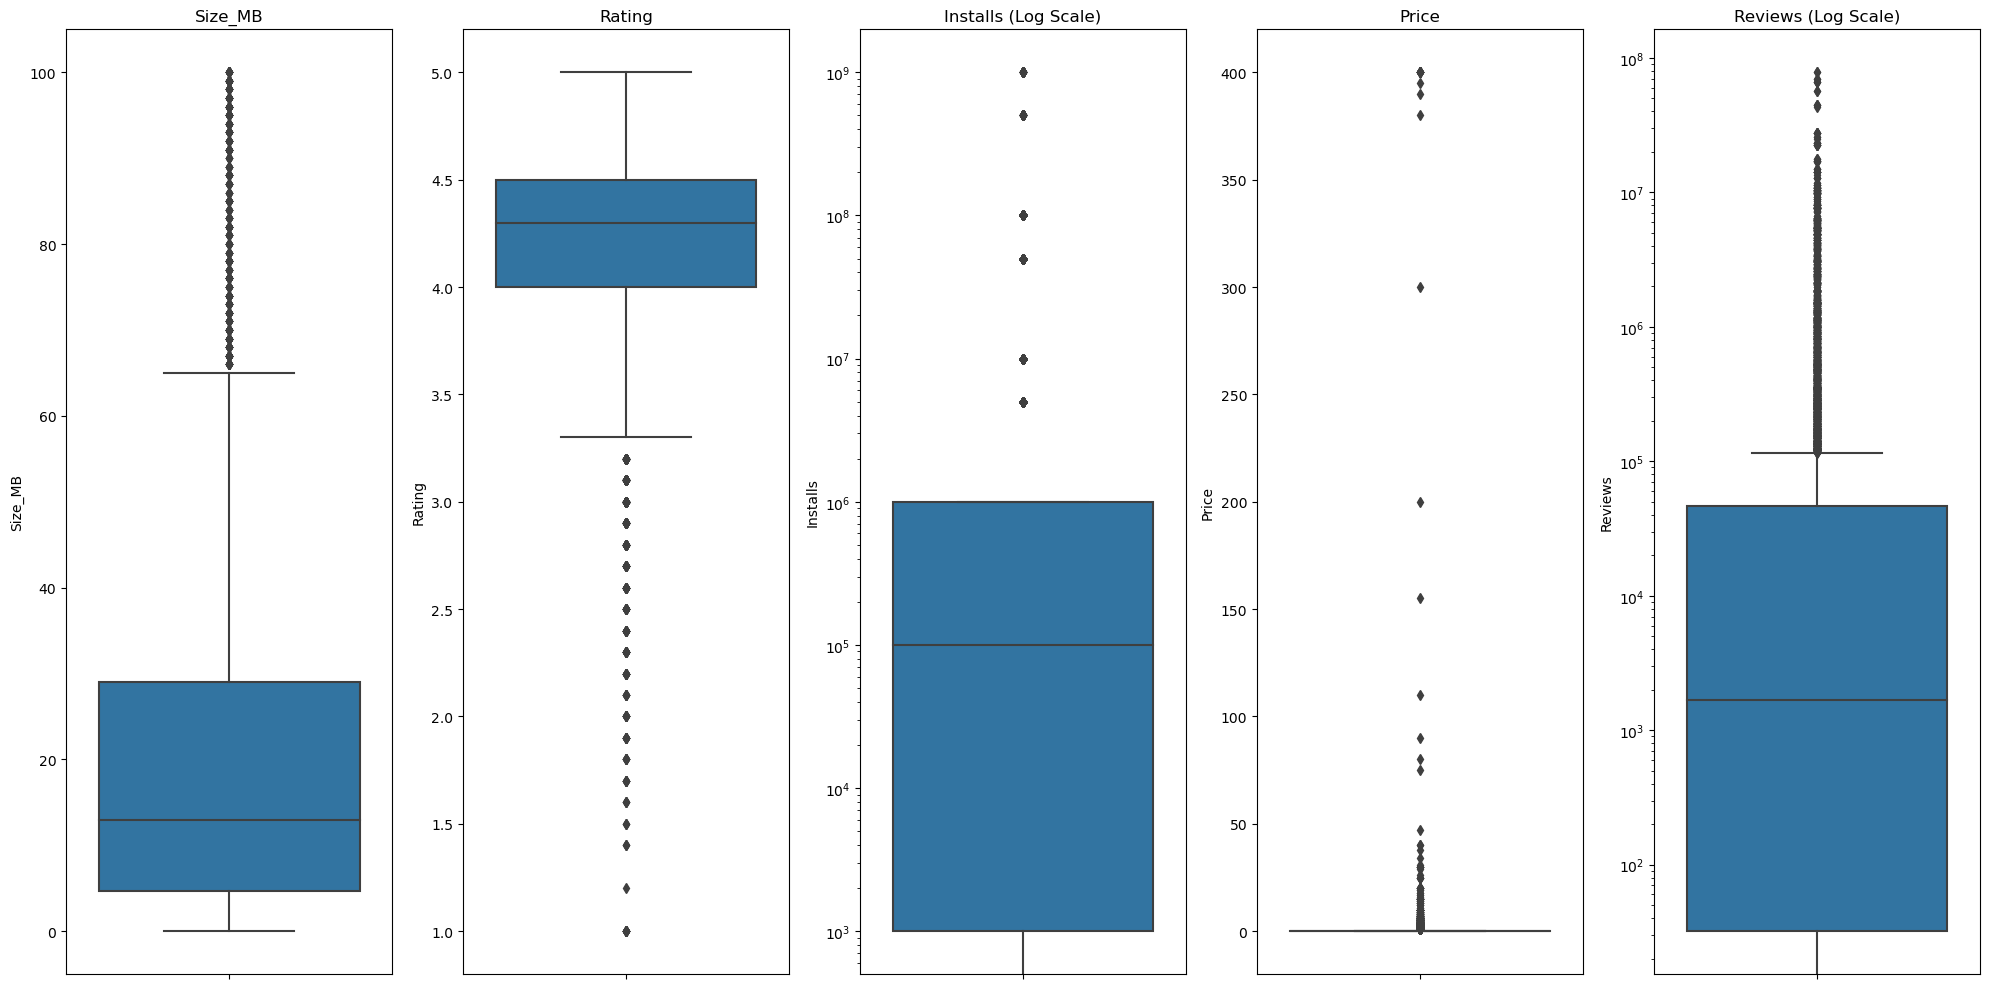

In [23]:
fig, axes = plt.subplots(1, 5, figsize=(20, 10))


sns.boxplot(data=apps, y='Size_MB', ax=axes[0])
axes[0].set_title('Size_MB')


sns.boxplot(data=apps, y='Rating', ax=axes[1])
axes[1].set_title('Rating')


sns.boxplot(data=apps, y='Installs', ax=axes[2])
axes[2].set_yscale('log')
axes[2].set_title('Installs (Log Scale)')


sns.boxplot(data=apps, y='Price', ax=axes[3])
axes[3].set_title('Price')


sns.boxplot(data=apps, y='Reviews', ax=axes[4])
axes[4].set_yscale('log')
axes[4].set_title('Reviews (Log Scale)')

plt.tight_layout()
plt.show()

<a id="paid-apps-vs-free-apps"></a>
## 3.Paid Apps vs Free Apps:

[back to top](#top)

בדיקת הקשרים בין אפליקציות בתשלום\חינמיות אל מול שאר הנתונים

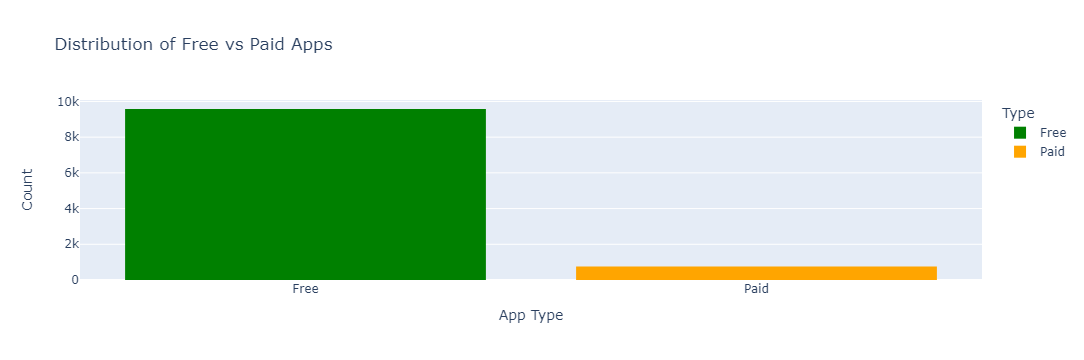

In [24]:
fig = px.histogram(apps, x='Type', color='Type', color_discrete_map={'Free': 'green', 'Paid': 'orange'}, title='Distribution of Free vs Paid Apps')

# הגדרת שמות צירים
fig.update_layout(
    xaxis_title='App Type',
    yaxis_title='Count'
)

# הצגת הגרף
fig.show()

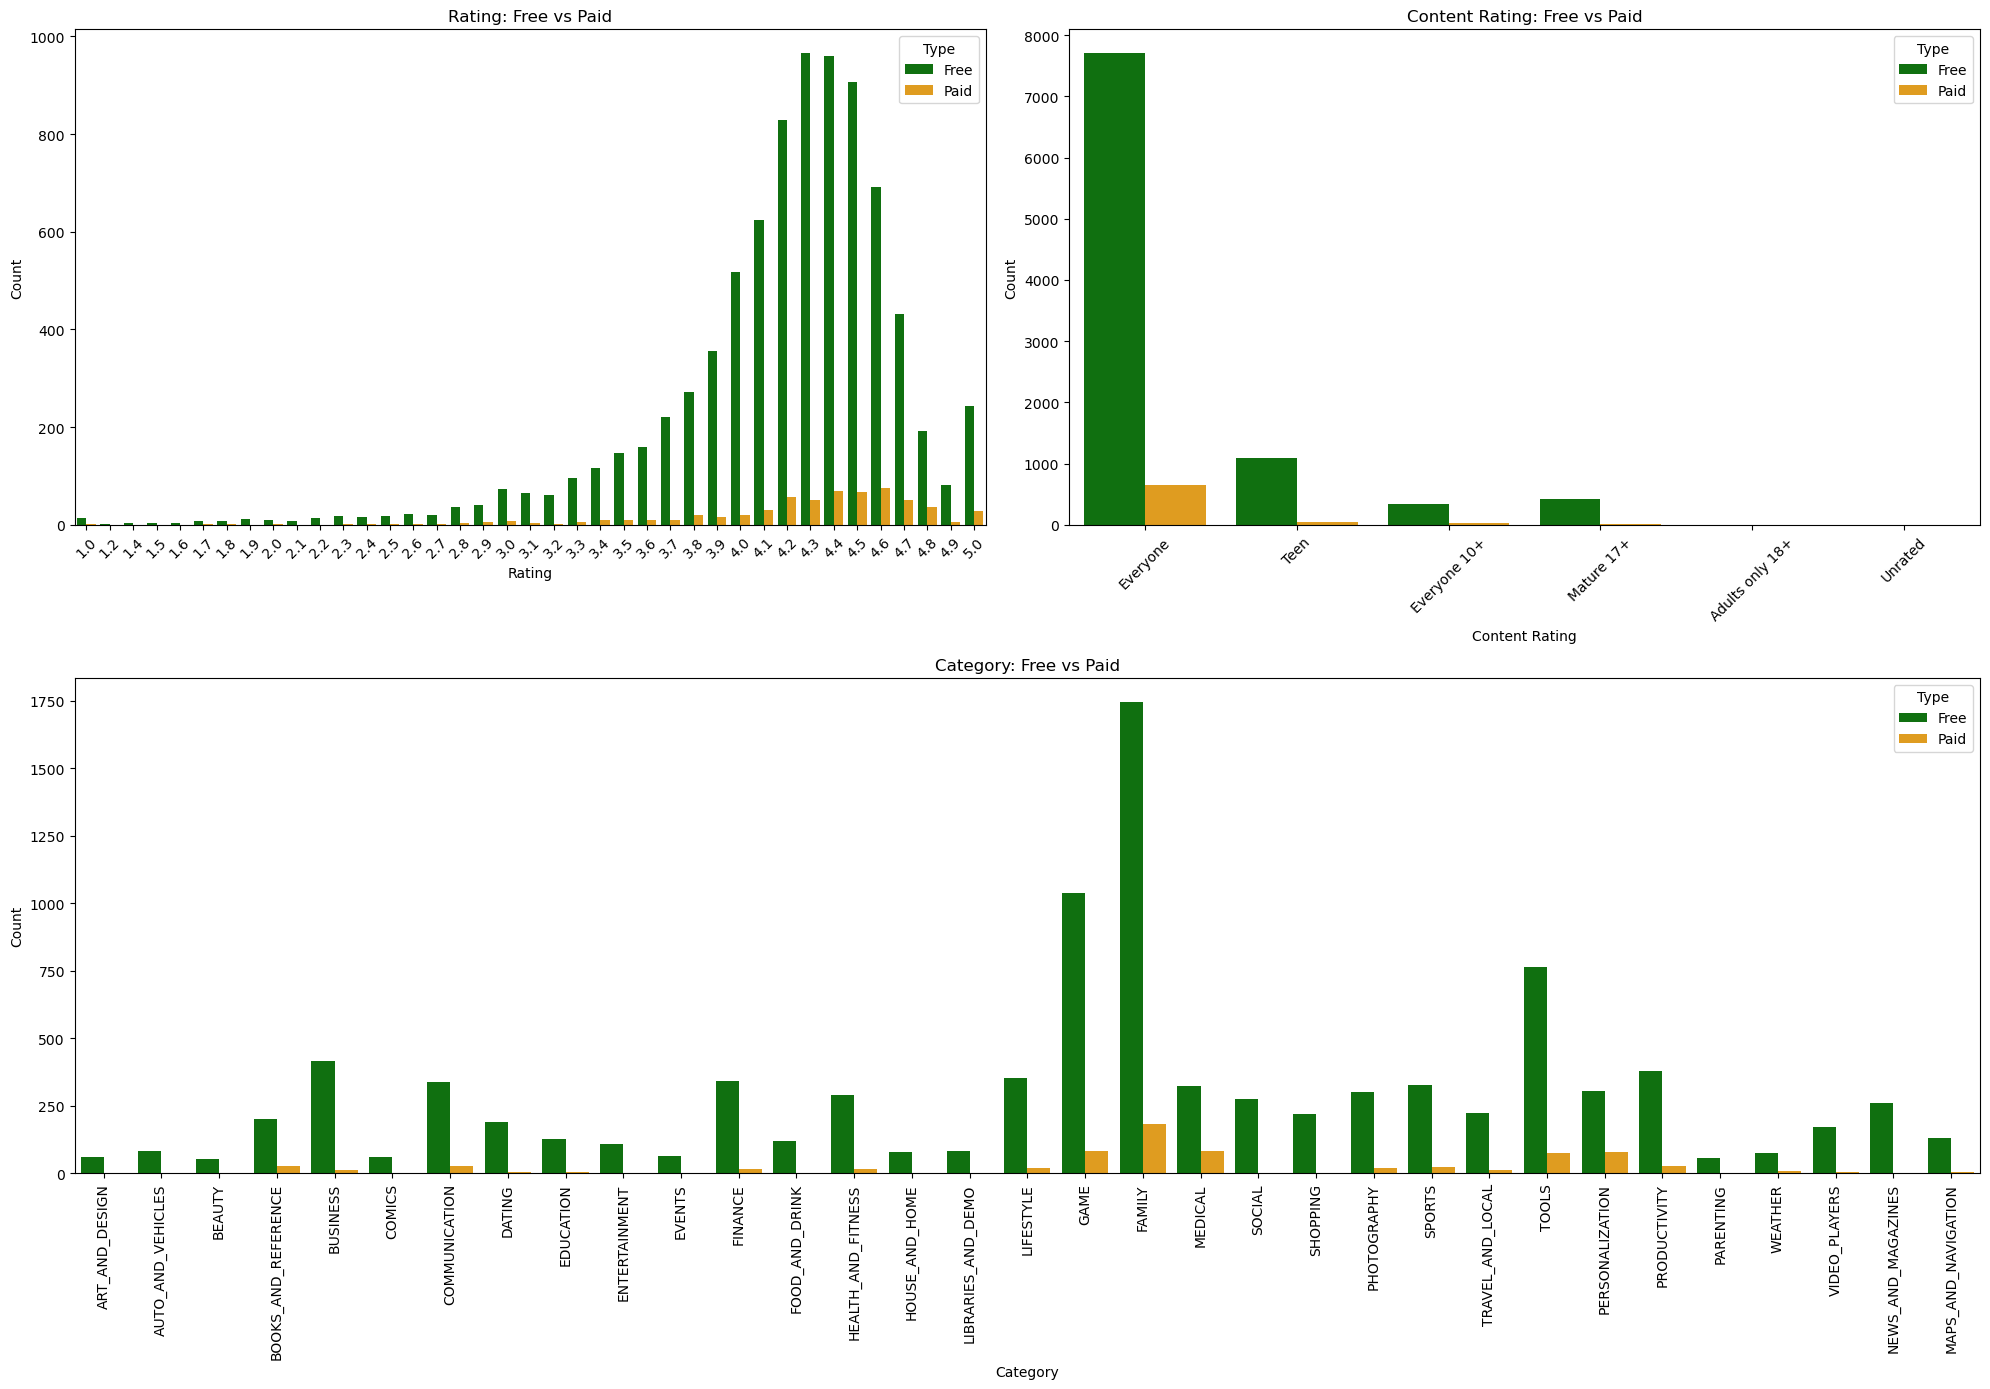

In [25]:
palette = {'Free': 'green', 'Paid': 'orange'}
fig = plt.figure(figsize=(20, 14))
gs = fig.add_gridspec(2, 2)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, :])

sns.countplot(x='Rating', hue='Type', data=apps, palette=palette, ax=ax1).set(title='Rating: Free vs Paid', xlabel='Rating', ylabel='Count')
sns.countplot(x='Content Rating', hue='Type', data=apps, palette=palette, ax=ax2).set(title='Content Rating: Free vs Paid', xlabel='Content Rating', ylabel='Count')
sns.countplot(x='Category', hue='Type', data=apps, palette=palette, ax=ax3).set(title='Category: Free vs Paid', xlabel='Category', ylabel='Count')

ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()

ניתן לראות את הקשר בין האפליקציות בחינם\בתשלום - לבין משתנים אחרים.

כגון הקטגוריות השונות, דירוג האפליקציה, סיווג האפליקציה על פי גילאים שונים. 

### נתרכז יותר בהבדל בין דירוגי וביקורות האפליקציה

In [26]:
average_rating_paid = apps[apps['Type'] == 'Paid']['Rating'].mean()
average_rating_free = apps[apps['Type'] == 'Free']['Rating'].mean()

print(f'The average rating of paid apps is: {round(average_rating_paid, 2)}')
print(f'The average rating of free apps is: {round(average_rating_free, 2)}')

The average rating of paid apps is: 4.26
The average rating of free apps is: 4.18


ההבדל אמנם קטן, אך ניתן לראות כי בממוצע דירגו באופן גבוה אפליקציות בתשלום.

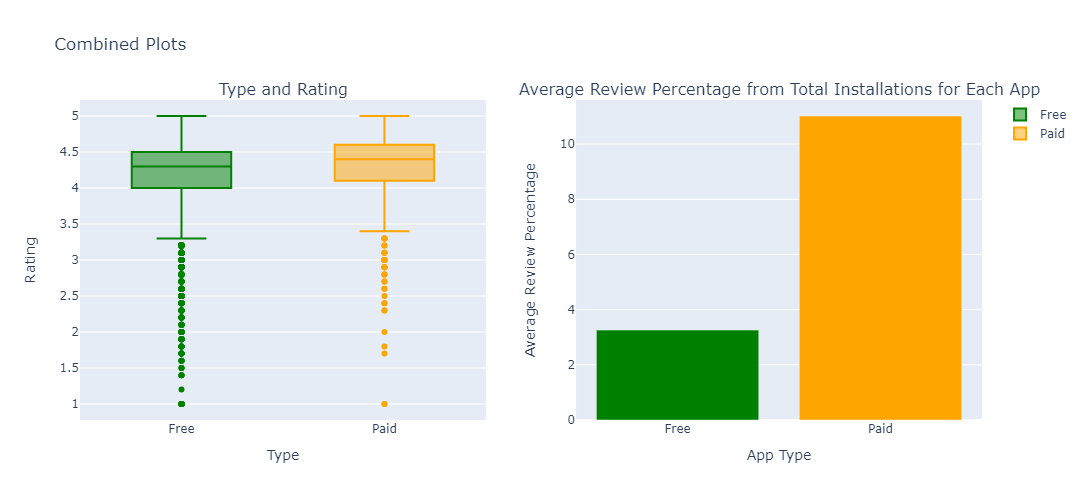

In [27]:

# Calculate review percentage
apps['Review_Percentage'] = (apps['Reviews'] / apps['Installs']) * 100

# Remove invalid values in 'Review_Percentage'
apps = apps.dropna(subset=['Review_Percentage'])
apps = apps[apps['Review_Percentage'].apply(lambda x: isinstance(x, (int, float)))]

# Calculate average review percentage by app type
average_review_percentage_df = apps.groupby('Type')['Review_Percentage'].mean().reset_index()
average_review_percentage_df.columns = ['Type', 'Average Review Percentage']

# Create subplots
fig = make_subplots(rows=1, cols=2, subplot_titles=(
    'Type and Rating',
    'Average Review Percentage from Total Installations for Each App'
))


# Add first plot to the first column
fig.add_trace(go.Box(
    y=apps['Rating'][apps['Type'] == 'Free'],
    name='Free',
    marker_color='green',
    legendgroup='Type'
), row=1, col=1)
fig.add_trace(go.Box(
    y=apps['Rating'][apps['Type'] == 'Paid'],
    name='Paid',
    marker_color='orange',
    legendgroup='Type'
), row=1, col=1)

# Add second plot to the second column
fig.add_trace(go.Bar(
    x=average_review_percentage_df['Type'],
    y=average_review_percentage_df['Average Review Percentage'],
    marker_color=['green', 'orange'],
    showlegend=False
), row=1, col=2)

# Update layout
fig.update_layout(height=500, width=1070, title_text='Combined Plots', showlegend=True)

# Update x-axes and y-axes
fig.update_xaxes(title_text='Type', row=1, col=1)
fig.update_yaxes(title_text='Rating', row=1, col=1)

fig.update_xaxes(title_text='App Type', row=1, col=2)
fig.update_yaxes(title_text='Average Review Percentage', row=1, col=2)

# Update legend
fig.update_layout(
    legend=dict(
        orientation="v",
        yanchor="top",
        y=1,
        xanchor="left",
        x=1.02
    )
)

# Show the combined plot
fig.show()


### תובנה 1:


ניתן לראות כי אחוז המשתמשים הפעילים בכתיבת ביקורות היה גבוה יותר עבור אפליקציות בתשלום, בהשוואה לאפליקציות חינמיות. 

נוסף על כך, הדירוג הממוצע של אפליקציות בתשלום היה גבוה יותר מזה של אפליקציות חינמיות

לסיכום, קיימת מעורבות רבה יותר מצד משתמשים באפליקציות בתשלום, ועם זאת, הם נוטים להעניק דירוגים גבוהים יותר לאפליקציות אלה. 

<a id="הקשר-בין-גודל-האפליקציה-לפופולריות-שלה"></a>
## 3.1 :הקשר בין גודל האפליקציה לפופולריות שלה

[back to top](#top)


In [28]:

# סינון האפליקציות בתשלום
paid_apps = apps[apps['Type'] == 'Paid']

# סינון האפליקציות החינמיות
free_apps = apps[apps['Type'] == 'Free']

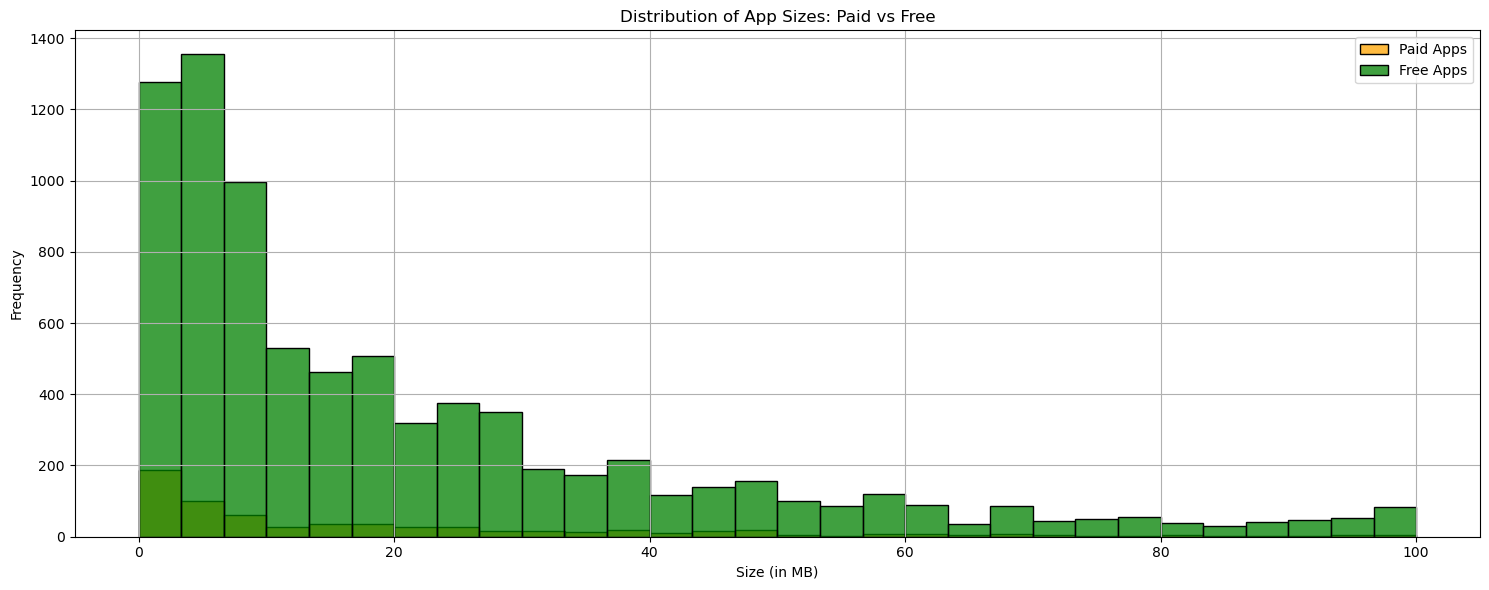

In [29]:

# התפלגות גדלי האפליקציות בתשלום בהשוואה לחינמיות
plt.figure(figsize=(15, 6))
sns.histplot(paid_apps['Size_MB'], color='orange', label='Paid Apps', bins=30)
sns.histplot(free_apps['Size_MB'], color='green', label='Free Apps', bins=30)
plt.title('Distribution of App Sizes: Paid vs Free')
plt.xlabel('Size (in MB)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

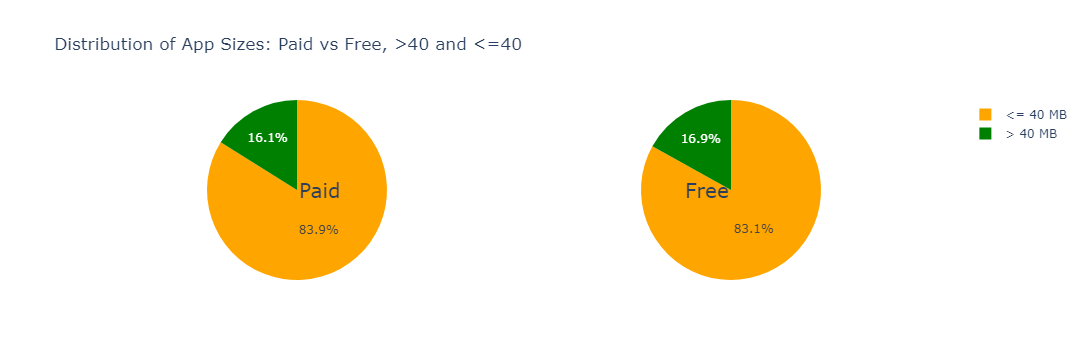

In [30]:

# חישוב מספר האפליקציות לפי קטגוריות גודל
size_counts = {
    'Paid': [paid_apps[paid_apps['Size_MB'] <= 40].shape[0], paid_apps[paid_apps['Size_MB'] > 40].shape[0]],
    'Free': [free_apps[free_apps['Size_MB'] <= 40].shape[0], free_apps[free_apps['Size_MB'] > 40].shape[0]]
}

# יצירת גרף עוגה באמצעות Plotly
fig = go.Figure()
for i, (app_type, counts) in enumerate(size_counts.items()):
    fig.add_trace(go.Pie(labels=['<= 40 MB', '> 40 MB'], values=counts, name=app_type,
                         marker_colors=['orange', 'green'], domain={'x': [i*0.5, (i+1)*0.5]}))

# עדכון פרטי התצוגה של הגרפים
fig.update_layout(title_text='Distribution of App Sizes: Paid vs Free, >40 and <=40',
                  annotations=[dict(text=key, x=(i*0.5 + (i+1)*0.5)/2, y=0.5, font_size=20, showarrow=False)
                               for i, key in enumerate(size_counts.keys())])

# הצגת הגרף
fig.show()


ניתן לראות באופן ברור כי קרוב ל86% מסך האפליקציות הם בעלות גודל יחסית קטן.

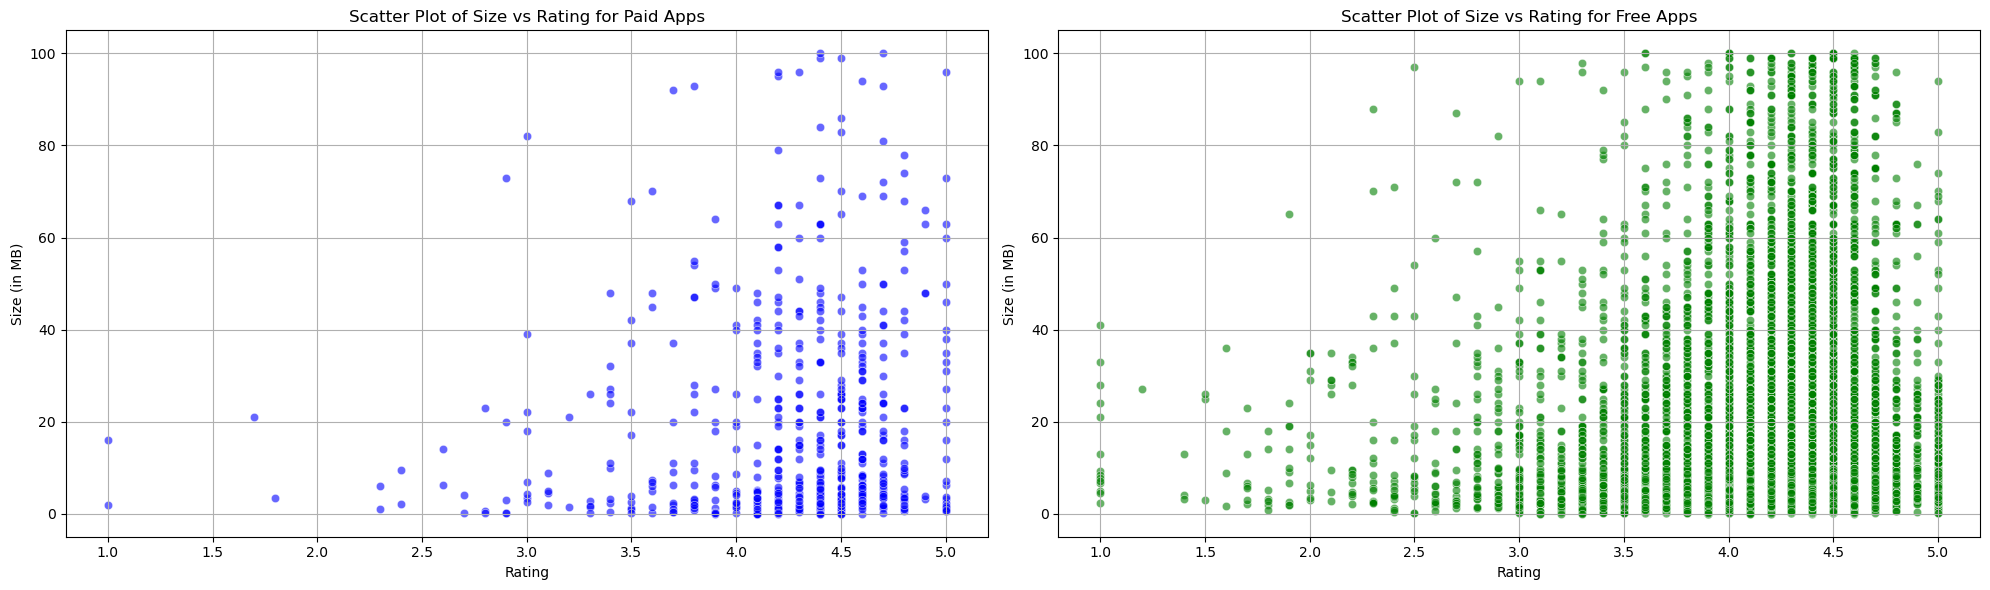

In [31]:
 
plt.figure(figsize=(20, 6))


plt.subplot(1, 2, 1)
sns.scatterplot(data=paid_apps, x='Rating', y='Size_MB', color='blue', alpha=0.6)
plt.title('Scatter Plot of Size vs Rating for Paid Apps')
plt.xlabel('Rating')
plt.ylabel('Size (in MB)')
plt.grid(True)


plt.subplot(1, 2, 2)
sns.scatterplot(data=free_apps, x='Rating', y='Size_MB', color='green', alpha=0.6)
plt.title('Scatter Plot of Size vs Rating for Free Apps')
plt.xlabel('Rating')
plt.ylabel('Size (in MB)')
plt.grid(True)

plt.tight_layout()
plt.show()


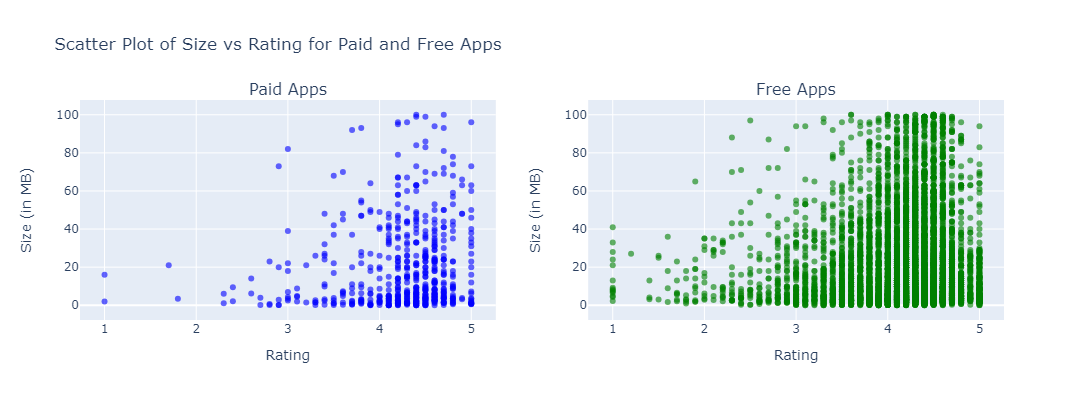

In [32]:

# יצירת גרפים כפולים עם Plotly
fig = make_subplots(rows=1, cols=2, subplot_titles=("Paid Apps", "Free Apps"))

# גרף פיזור עבור אפליקציות בתשלום
scatter_paid = go.Scatter(x=paid_apps['Rating'], y=paid_apps['Size_MB'], mode='markers',
                          marker=dict(color='blue', opacity=0.6), name='Paid Apps')
fig.add_trace(scatter_paid, row=1, col=1)

# גרף פיזור עבור אפליקציות חינמיות
scatter_free = go.Scatter(x=free_apps['Rating'], y=free_apps['Size_MB'], mode='markers',
                          marker=dict(color='green', opacity=0.6), name='Free Apps')
fig.add_trace(scatter_free, row=1, col=2)

# עדכון פרטי התצוגה של הגרפים
fig.update_layout(title_text='Scatter Plot of Size vs Rating for Paid and Free Apps',
                  width=1100, height=400, showlegend=False)

# הגדרת שמות צירים לכל גרף בנפרד
fig.update_xaxes(title_text='Rating', row=1, col=1)
fig.update_yaxes(title_text='Size (in MB)', row=1, col=1)

fig.update_xaxes(title_text='Rating', row=1, col=2)
fig.update_yaxes(title_text='Size (in MB)', row=1, col=2)

# הצגת הגרף
fig.show()


### תובנה 2:

רוב האפליקציות הן בעלות גודל קטן הן בתשלום והן בחינם. אם נתמקד באפליקציות בתשלום, ניתן לראות באופן ברור וחד יותר כי ישנה העדפת משתמש לאפליקציות **קלות משקל**. ע"פ דירוג המשתמשים ניתן לראות כי אפליקציה בתשלום שהיא כבדה עשויה שלא להצליח בשוק.



# הקשר בין הקטגוריה

Number of categories =  33


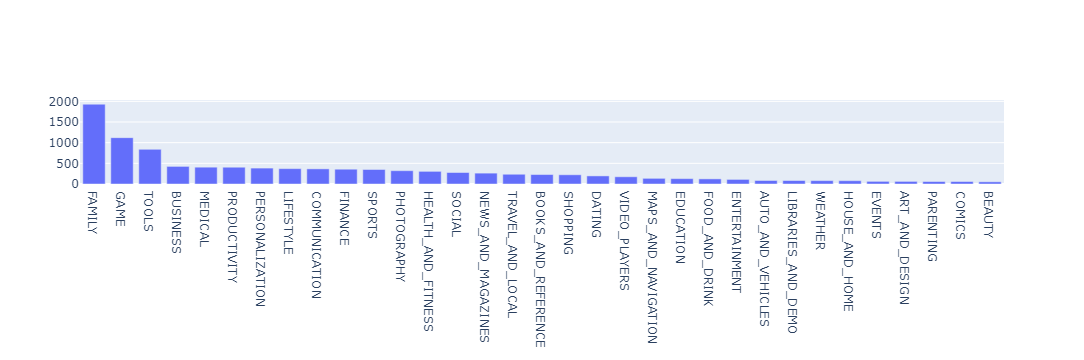

In [33]:

num_categories = len(apps["Category"].unique())
print('Number of categories = ', num_categories)


num_apps_in_category = apps["Category"].value_counts().sort_values(ascending = False)

data = [go.Bar(
        x = num_apps_in_category.index, # index = category name
        y = num_apps_in_category.values, # value = count
)]

plotly.offline.iplot(data)

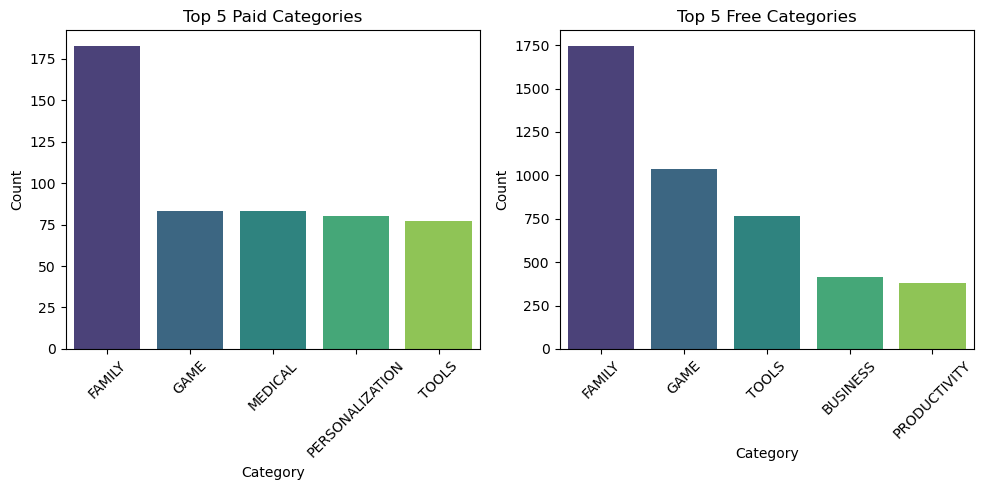

In [34]:

# מציאת ה-5 קטגוריות התכופות ביותר שבתשלום
top_5_paid_categories = paid_apps['Category'].value_counts().head(5)

# מציאת ה-5 קטגוריות התכופות ביותר בחינם
top_5_free_categories = free_apps['Category'].value_counts().head(5)

# קביעת גודל התמונה
plt.figure(figsize=(10, 5))

# subplot עבור גרף הקטגוריות בתשלום
plt.subplot(1, 2, 1)
sns.countplot(data=paid_apps, x='Category', order=top_5_paid_categories.index, palette='viridis')
plt.title('Top 5 Paid Categories')
plt.ylabel('Count')
plt.xticks(rotation=45)

# subplot עבור גרף הקטגוריות בחינם
plt.subplot(1, 2, 2)
sns.countplot(data=free_apps, x='Category', order=top_5_free_categories.index, palette='viridis')
plt.title('Top 5 Free Categories')
plt.ylabel('Count')
plt.xticks(rotation=45)

# תצוגת הגרפים
plt.tight_layout()
plt.show()


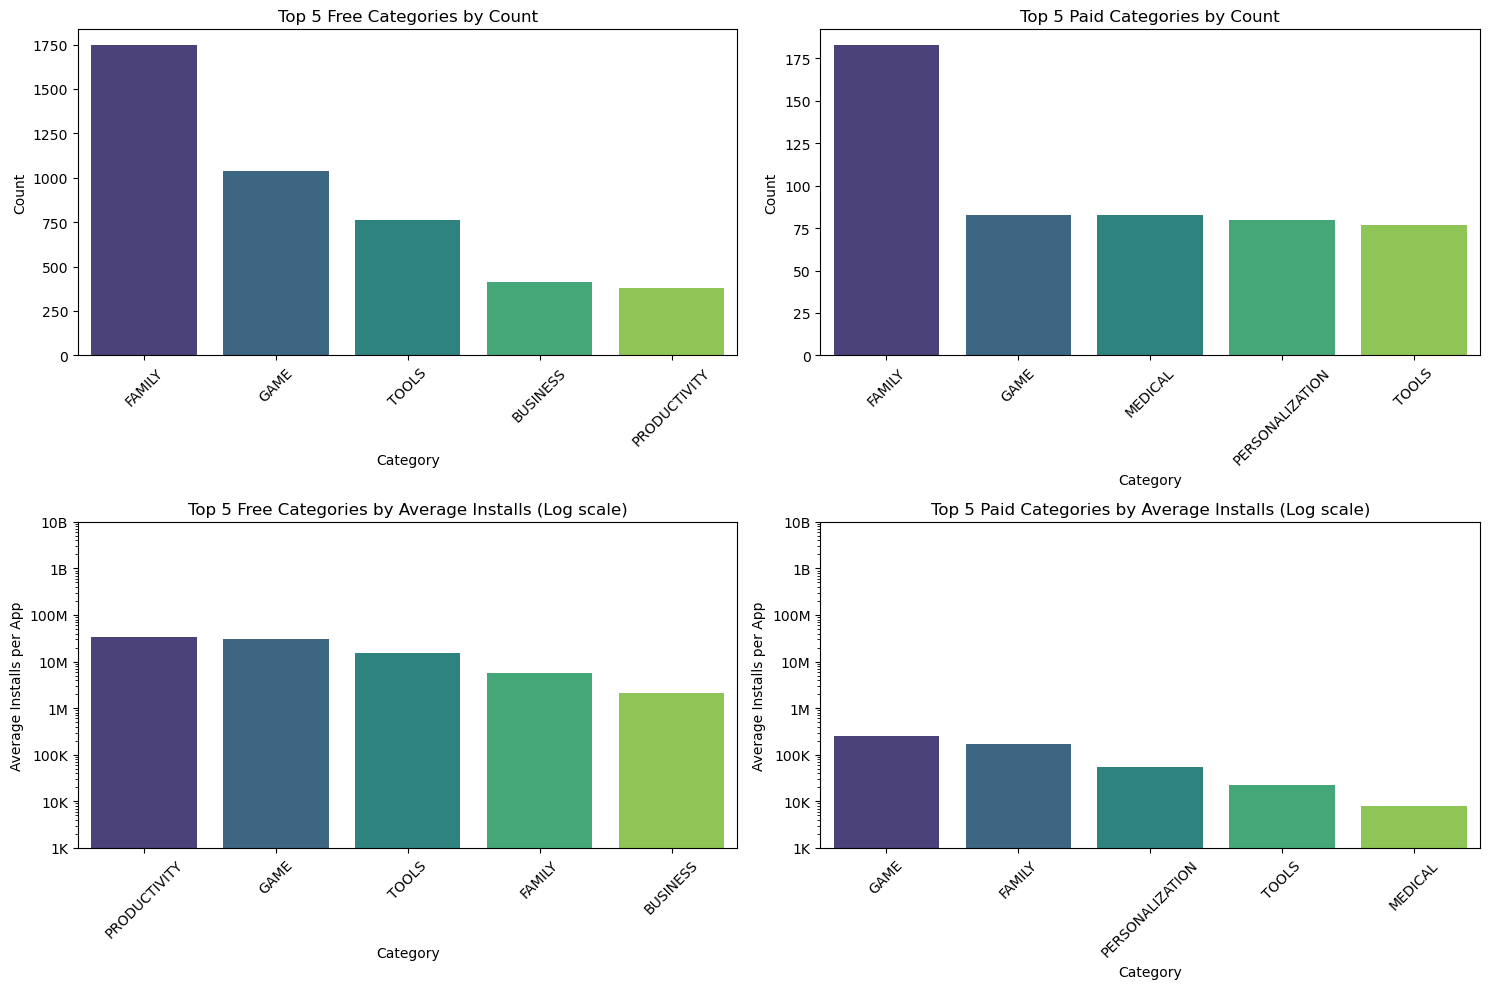

In [35]:

# Find the top 5 most frequent categories for paid and free apps
top_5_paid_categories = paid_apps['Category'].value_counts().head(5).index
top_5_free_categories = free_apps['Category'].value_counts().head(5).index

# Filter the data for the top 5 categories
paid_apps_top_5 = paid_apps[paid_apps['Category'].isin(top_5_paid_categories)]
free_apps_top_5 = free_apps[free_apps['Category'].isin(top_5_free_categories)]

# Calculate average installs by category for free apps
free_installs_avg = free_apps.groupby('Category')['Installs'].mean().reset_index()
top_5_free_installs_avg = free_installs_avg[free_installs_avg['Category'].isin(top_5_free_categories)].sort_values(by='Installs', ascending=False)

# Calculate average installs by category for paid apps
paid_installs_avg = paid_apps.groupby('Category')['Installs'].mean().reset_index()
top_5_paid_installs_avg = paid_installs_avg[paid_installs_avg['Category'].isin(top_5_paid_categories)].sort_values(by='Installs', ascending=False)

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot top 5 free categories by count
sns.countplot(data=free_apps_top_5, x='Category', order=top_5_free_categories, ax=axes[0, 0], palette='viridis')
axes[0, 0].set_title('Top 5 Free Categories by Count')
axes[0, 0].set_ylabel('Count')
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=45)

# Plot top 5 paid categories by count
sns.countplot(data=paid_apps_top_5, x='Category', order=top_5_paid_categories, ax=axes[0, 1], palette='viridis')
axes[0, 1].set_title('Top 5 Paid Categories by Count')
axes[0, 1].set_ylabel('Count')
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=45)

# Plot top 5 free categories by average installs with log scale
sns.barplot(data=top_5_free_installs_avg, x='Category', y='Installs', ax=axes[1, 0], palette='viridis')
axes[1, 0].set_title('Top 5 Free Categories by Average Installs (Log scale)')
axes[1, 0].set_ylabel('Average Installs per App')
axes[1, 0].set_yscale('log')
axes[1, 0].set_yticks([1e3, 1e4, 1e5, 1e6, 1e7, 1e8, 1e9, 1e10])
axes[1, 0].set_yticklabels(['1K', '10K', '100K', '1M', '10M', '100M', '1B', '10B'])
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=45)

# Plot top 5 paid categories by average installs with log scale
sns.barplot(data=top_5_paid_installs_avg, x='Category', y='Installs', ax=axes[1, 1], palette='viridis')
axes[1, 1].set_title('Top 5 Paid Categories by Average Installs (Log scale)')
axes[1, 1].set_ylabel('Average Installs per App')
axes[1, 1].set_yscale('log')
axes[1, 1].set_yticks([1e3, 1e4, 1e5, 1e6, 1e7, 1e8, 1e9, 1e10])
axes[1, 1].set_yticklabels(['1K', '10K', '100K', '1M', '10M', '100M', '1B', '10B'])
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()


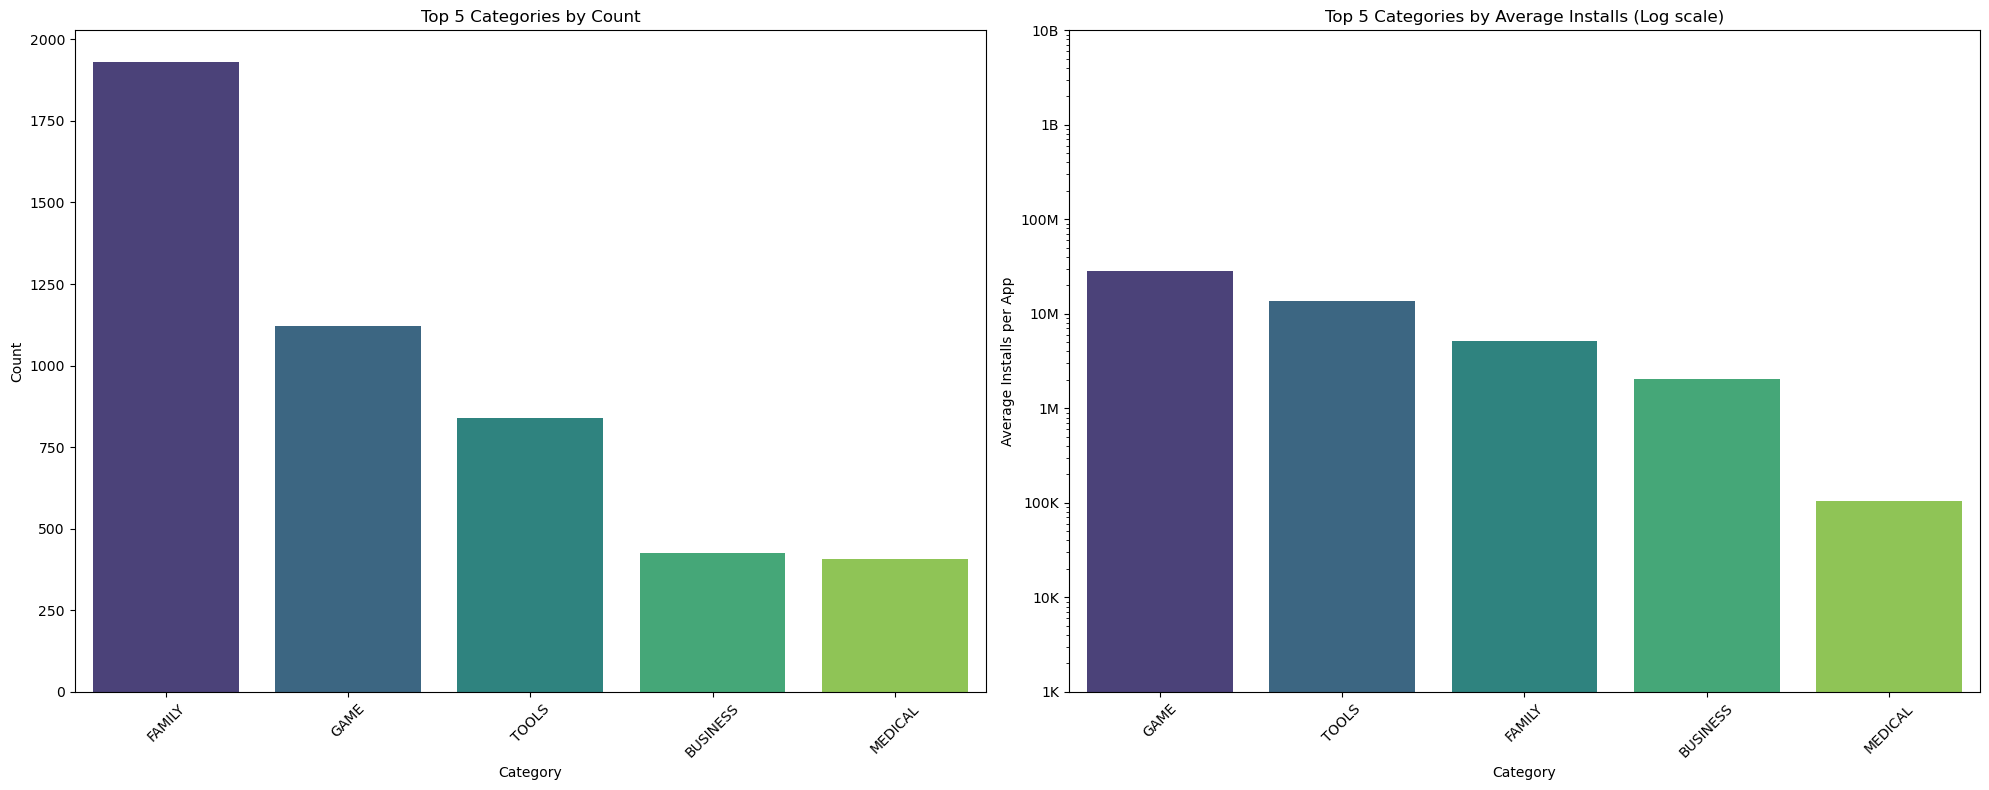

In [36]:

# Find the top 5 most frequent categories
top_5_categories = apps['Category'].value_counts().head(5).index

# Filter the data for the top 5 categories
apps_top_5 = apps[apps['Category'].isin(top_5_categories)]

# Calculate average installs by category
installs_avg = apps.groupby('Category')['Installs'].mean().reset_index()
top_5_installs_avg = installs_avg[installs_avg['Category'].isin(top_5_categories)].sort_values(by='Installs', ascending=False)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Plot top 5 categories by count
sns.countplot(data=apps_top_5, x='Category', order=top_5_categories, ax=axes[0], palette='viridis')
axes[0].set_title('Top 5 Categories by Count')
axes[0].set_ylabel('Count')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)

# Plot top 5 categories by average installs with log scale
sns.barplot(data=top_5_installs_avg, x='Category', y='Installs', ax=axes[1], palette='viridis')
axes[1].set_title('Top 5 Categories by Average Installs (Log scale)')
axes[1].set_ylabel('Average Installs per App')
axes[1].set_yscale('log')
axes[1].set_yticks([1e3, 1e4, 1e5, 1e6, 1e7, 1e8, 1e9, 1e10])
axes[1].set_yticklabels(['1K', '10K', '100K', '1M', '10M', '100M', '1B', '10B'])
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()


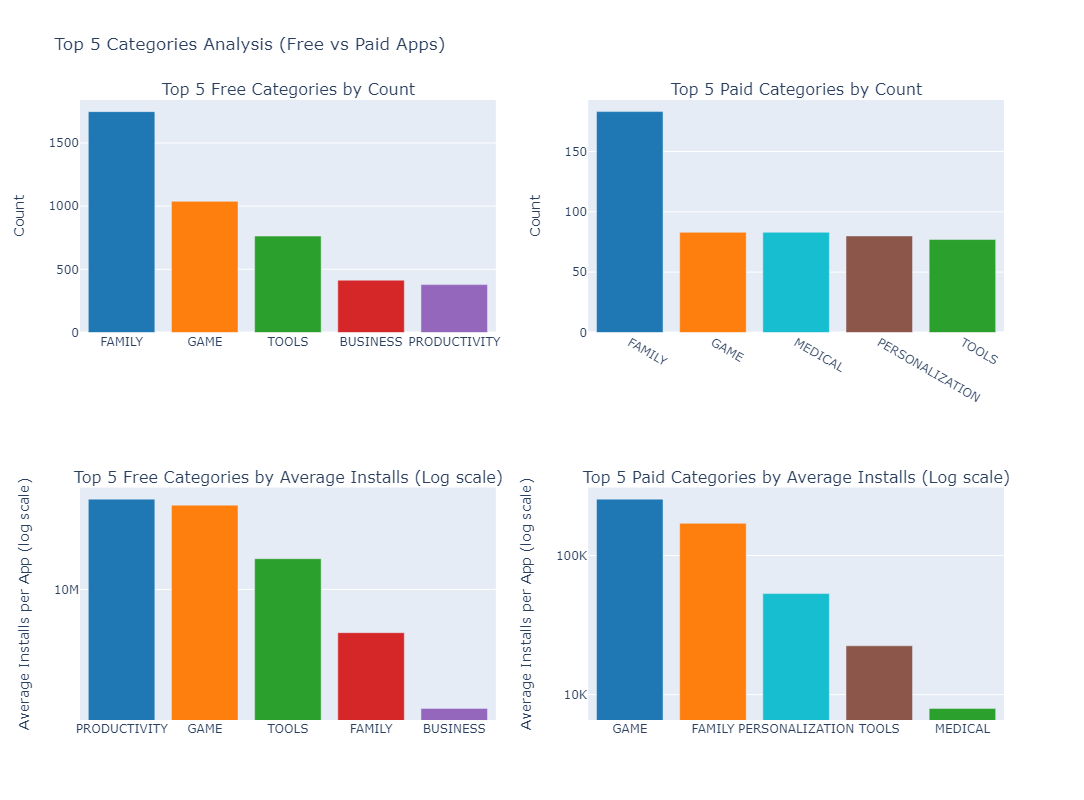

In [37]:

# Find the top 5 most frequent categories for paid and free apps
top_5_paid_categories = paid_apps['Category'].value_counts().head(5).index
top_5_free_categories = free_apps['Category'].value_counts().head(5).index

# Filter the data for the top 5 categories
paid_apps_top_5 = paid_apps[paid_apps['Category'].isin(top_5_paid_categories)]
free_apps_top_5 = free_apps[free_apps['Category'].isin(top_5_free_categories)]

# Calculate average installs by category for free apps
free_installs_avg = free_apps.groupby('Category')['Installs'].mean().reset_index()
top_5_free_installs_avg = free_installs_avg[free_installs_avg['Category'].isin(top_5_free_categories)].sort_values(by='Installs', ascending=False)

# Calculate average installs by category for paid apps
paid_installs_avg = paid_apps.groupby('Category')['Installs'].mean().reset_index()
top_5_paid_installs_avg = paid_installs_avg[paid_installs_avg['Category'].isin(top_5_paid_categories)].sort_values(by='Installs', ascending=False)

# Define colors for the categories
category_colors = {
    'FAMILY': '#1f77b4',
    'GAME': '#ff7f0e',
    'TOOLS': '#2ca02c',
    'BUSINESS': '#d62728',
    'PRODUCTIVITY': '#9467bd',
    'PERSONALIZATION': '#8c564b',
    'COMMUNICATION': '#e377c2',
    'SOCIAL': '#7f7f7f',
    'PHOTOGRAPHY': '#bcbd22',
    'MEDICAL': '#17becf'
}

# Map colors to categories
free_colors = [category_colors[category] for category in top_5_free_categories]
paid_colors = [category_colors[category] for category in top_5_paid_categories]

# Create subplots
fig = make_subplots(rows=2, cols=2, subplot_titles=(
    'Top 5 Free Categories by Count', 
    'Top 5 Paid Categories by Count', 
    'Top 5 Free Categories by Average Installs (Log scale)', 
    'Top 5 Paid Categories by Average Installs (Log scale)'
))

# Add bar plot for top 5 free categories by count
fig.add_trace(
    go.Bar(x=top_5_free_categories, y=free_apps_top_5['Category'].value_counts().loc[top_5_free_categories], marker_color=free_colors),
    row=1, col=1
)

# Add bar plot for top 5 paid categories by count
fig.add_trace(
    go.Bar(x=top_5_paid_categories, y=paid_apps_top_5['Category'].value_counts().loc[top_5_paid_categories], marker_color=paid_colors),
    row=1, col=2
)

# Add bar plot for top 5 free categories by average installs
fig.add_trace(
    go.Bar(x=top_5_free_installs_avg['Category'], y=top_5_free_installs_avg['Installs'], marker_color=free_colors),
    row=2, col=1
)

# Add bar plot for top 5 paid categories by average installs
fig.add_trace(
    go.Bar(x=top_5_paid_installs_avg['Category'], y=top_5_paid_installs_avg['Installs'], marker_color=paid_colors),
    row=2, col=2
)

# Update layout for better readability and set y-axis to log scale for install plots
fig.update_layout(title_text='Top 5 Categories Analysis (Free vs Paid Apps)', showlegend=False, height=800)
fig.update_yaxes(title_text='Count', row=1, col=1)
fig.update_yaxes(title_text='Count', row=1, col=2)
fig.update_yaxes(title_text='Average Installs per App (log scale)', type='log', row=2, col=1)
fig.update_yaxes(title_text='Average Installs per App (log scale)', type='log', row=2, col=2)
fig.update_yaxes(tickvals=[1e3, 1e4, 1e5, 1e6, 1e7, 1e8, 1e9, 1e10], ticktext=['1K', '10K', '100K', '1M', '10M', '100M', '1B', '10B'], row=2, col=1)
fig.update_yaxes(tickvals=[1e3, 1e4, 1e5, 1e6, 1e7, 1e8, 1e9, 1e10], ticktext=['1K', '10K', '100K', '1M', '10M', '100M', '1B', '10B'], row=2, col=2)

# Show the plot
fig.show()


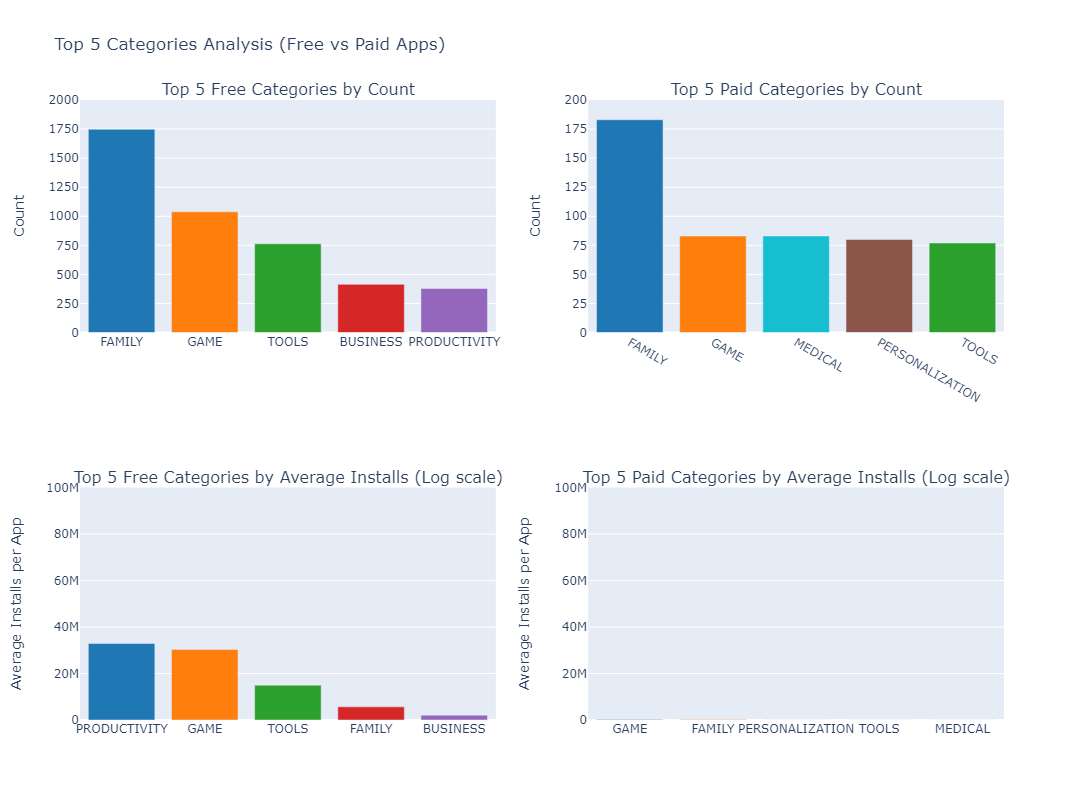

In [38]:

# Find the top 5 most frequent categories for paid and free apps
top_5_paid_categories = paid_apps['Category'].value_counts().head(5).index
top_5_free_categories = free_apps['Category'].value_counts().head(5).index

# Filter the data for the top 5 categories
paid_apps_top_5 = paid_apps[paid_apps['Category'].isin(top_5_paid_categories)]
free_apps_top_5 = free_apps[free_apps['Category'].isin(top_5_free_categories)]

# Calculate average installs by category for free apps
free_installs_avg = free_apps.groupby('Category')['Installs'].mean().reset_index()
top_5_free_installs_avg = free_installs_avg[free_installs_avg['Category'].isin(top_5_free_categories)].sort_values(by='Installs', ascending=False)

# Calculate average installs by category for paid apps
paid_installs_avg = paid_apps.groupby('Category')['Installs'].mean().reset_index()
top_5_paid_installs_avg = paid_installs_avg[paid_installs_avg['Category'].isin(top_5_paid_categories)].sort_values(by='Installs', ascending=False)

# Define colors for the categories
category_colors = {
    'FAMILY': '#1f77b4',
    'GAME': '#ff7f0e',
    'TOOLS': '#2ca02c',
    'BUSINESS': '#d62728',
    'PRODUCTIVITY': '#9467bd',
    'PERSONALIZATION': '#8c564b',
    'COMMUNICATION': '#e377c2',
    'SOCIAL': '#7f7f7f',
    'PHOTOGRAPHY': '#bcbd22',
    'MEDICAL': '#17becf'
}

# Map colors to categories
free_colors = [category_colors[category] for category in top_5_free_categories]
paid_colors = [category_colors[category] for category in top_5_paid_categories]

# Create subplots
fig = make_subplots(rows=2, cols=2, subplot_titles=(
    'Top 5 Free Categories by Count', 
    'Top 5 Paid Categories by Count', 
    'Top 5 Free Categories by Average Installs (Log scale)', 
    'Top 5 Paid Categories by Average Installs (Log scale)'
))

# Add bar plot for top 5 free categories by count
fig.add_trace(
    go.Bar(x=top_5_free_categories, y=free_apps_top_5['Category'].value_counts().loc[top_5_free_categories], marker_color=free_colors),
    row=1, col=1
)

# Add bar plot for top 5 paid categories by count
fig.add_trace(
    go.Bar(x=top_5_paid_categories, y=paid_apps_top_5['Category'].value_counts().loc[top_5_paid_categories], marker_color=paid_colors),
    row=1, col=2
)

# Add bar plot for top 5 free categories by average installs
fig.add_trace(
    go.Bar(x=top_5_free_installs_avg['Category'], y=top_5_free_installs_avg['Installs'], marker_color=free_colors),
    row=2, col=1
)

# Add bar plot for top 5 paid categories by average installs
fig.add_trace(
    go.Bar(x=top_5_paid_installs_avg['Category'], y=top_5_paid_installs_avg['Installs'], marker_color=paid_colors),
    row=2, col=2
)

# Update layout for better readability and set y-axis to log scale for install plots
fig.update_layout(title_text='Top 5 Categories Analysis (Free vs Paid Apps)', showlegend=False, height=800)

# Update y-axes for the first row
fig.update_yaxes(title_text='Count', range=[0, 2000], dtick=250, row=1, col=1)
fig.update_yaxes(title_text='Count', range=[0, 200], dtick=25, row=1, col=2)

# Update y-axes for the second row
fig.update_yaxes(title_text='Average Installs per App', range=[0, 1e8], row=2, col=1)
fig.update_yaxes(title_text='Average Installs per App', range=[0, 1e8], row=2, col=2)

# Show the plot
fig.show()


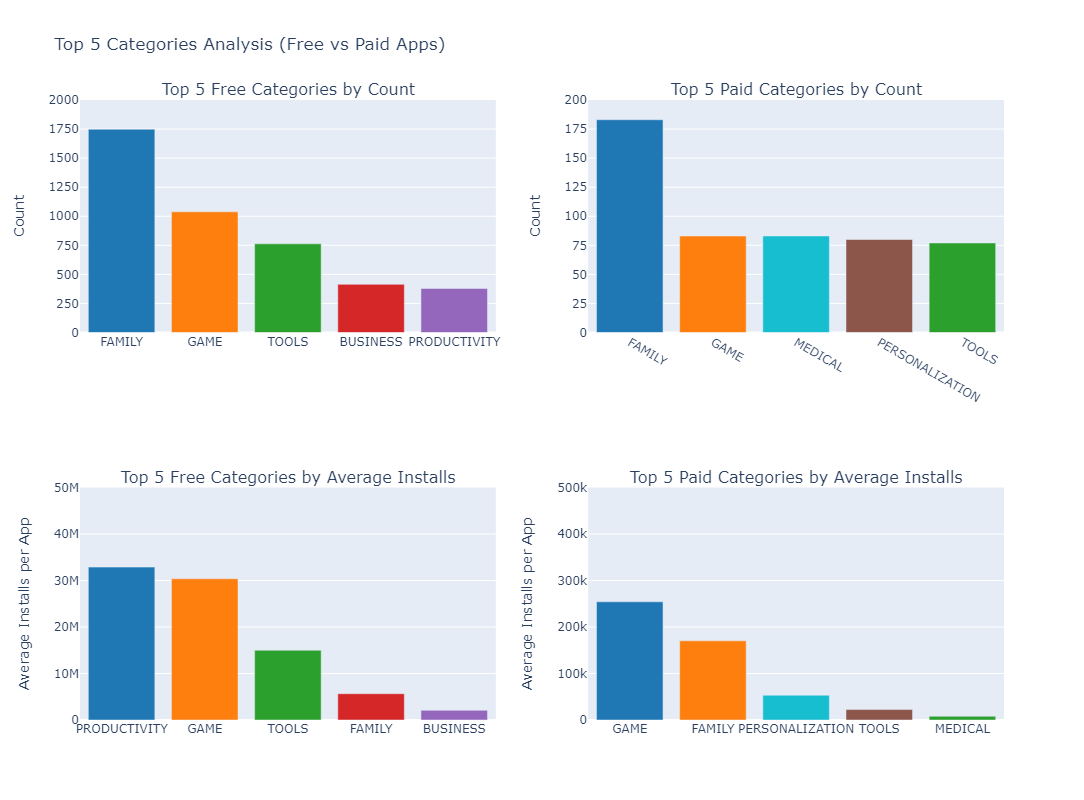

In [39]:

# Find the top 5 most frequent categories for paid and free apps
top_5_paid_categories = paid_apps['Category'].value_counts().head(5).index
top_5_free_categories = free_apps['Category'].value_counts().head(5).index

# Filter the data for the top 5 categories
paid_apps_top_5 = paid_apps[paid_apps['Category'].isin(top_5_paid_categories)]
free_apps_top_5 = free_apps[free_apps['Category'].isin(top_5_free_categories)]

# Calculate average installs by category for free apps
free_installs_avg = free_apps.groupby('Category')['Installs'].mean().reset_index()
top_5_free_installs_avg = free_installs_avg[free_installs_avg['Category'].isin(top_5_free_categories)].sort_values(by='Installs', ascending=False)

# Calculate average installs by category for paid apps
paid_installs_avg = paid_apps.groupby('Category')['Installs'].mean().reset_index()
top_5_paid_installs_avg = paid_installs_avg[paid_installs_avg['Category'].isin(top_5_paid_categories)].sort_values(by='Installs', ascending=False)

# Define colors for the categories
category_colors = {
    'FAMILY': '#1f77b4',
    'GAME': '#ff7f0e',
    'TOOLS': '#2ca02c',
    'BUSINESS': '#d62728',
    'PRODUCTIVITY': '#9467bd',
    'PERSONALIZATION': '#8c564b',
    'COMMUNICATION': '#e377c2',
    'SOCIAL': '#7f7f7f',
    'PHOTOGRAPHY': '#bcbd22',
    'MEDICAL': '#17becf'
}

# Map colors to categories
free_colors = [category_colors[category] for category in top_5_free_categories]
paid_colors = [category_colors[category] for category in top_5_paid_categories]

# Create subplots
fig = make_subplots(rows=2, cols=2, subplot_titles=(
    'Top 5 Free Categories by Count', 
    'Top 5 Paid Categories by Count', 
    'Top 5 Free Categories by Average Installs', 
    'Top 5 Paid Categories by Average Installs'
))

# Add bar plot for top 5 free categories by count
fig.add_trace(
    go.Bar(x=top_5_free_categories, y=free_apps_top_5['Category'].value_counts().loc[top_5_free_categories], marker_color=free_colors),
    row=1, col=1
)

# Add bar plot for top 5 paid categories by count
fig.add_trace(
    go.Bar(x=top_5_paid_categories, y=paid_apps_top_5['Category'].value_counts().loc[top_5_paid_categories], marker_color=paid_colors),
    row=1, col=2
)

# Add bar plot for top 5 free categories by average installs
fig.add_trace(
    go.Bar(x=top_5_free_installs_avg['Category'], y=top_5_free_installs_avg['Installs'], marker_color=free_colors),
    row=2, col=1
)

# Add bar plot for top 5 paid categories by average installs
fig.add_trace(
    go.Bar(x=top_5_paid_installs_avg['Category'], y=top_5_paid_installs_avg['Installs'], marker_color=paid_colors),
    row=2, col=2
)

# Update layout for better readability
fig.update_layout(title_text='Top 5 Categories Analysis (Free vs Paid Apps)', showlegend=False, height=800)

# Update y-axes for the first row
fig.update_yaxes(title_text='Count', range=[0, 2000], dtick=250, row=1, col=1)
fig.update_yaxes(title_text='Count', range=[0, 200], dtick=25, row=1, col=2)

# Update y-axes for the second row
fig.update_yaxes(title_text='Average Installs per App', range=[0, 5e7], row=2, col=1)
fig.update_yaxes(title_text='Average Installs per App', range=[0, 5e5], row=2, col=2)

# Show the plot
fig.show()


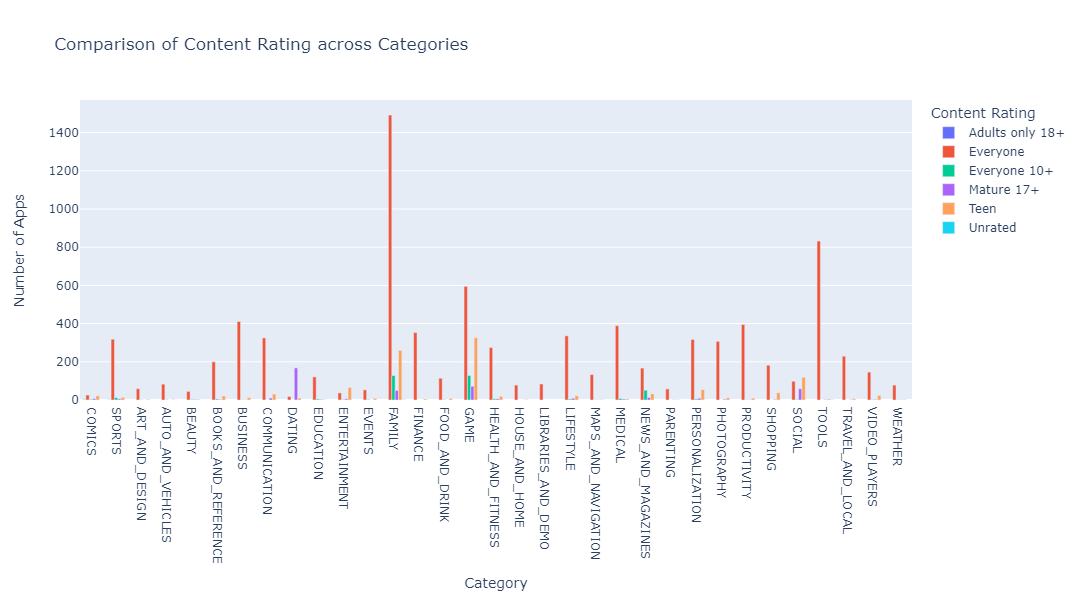

In [40]:

# Create a dataframe for content rating analysis
content_rating_analysis = apps.groupby(['Content Rating', 'Category']).size().reset_index(name='Count')

# Create a bar plot to compare Content Rating across Categories
fig = px.bar(content_rating_analysis, 
             x='Category', 
             y='Count', 
             color='Content Rating',
             title='Comparison of Content Rating across Categories',
             labels={'Count': 'Number of Apps'},
             barmode='group',
             height=600)

# Update layout for better readability
fig.update_layout(xaxis_title='Category',
                  yaxis_title='Number of Apps',
                  legend_title='Content Rating')

# Show the plot
fig.show()


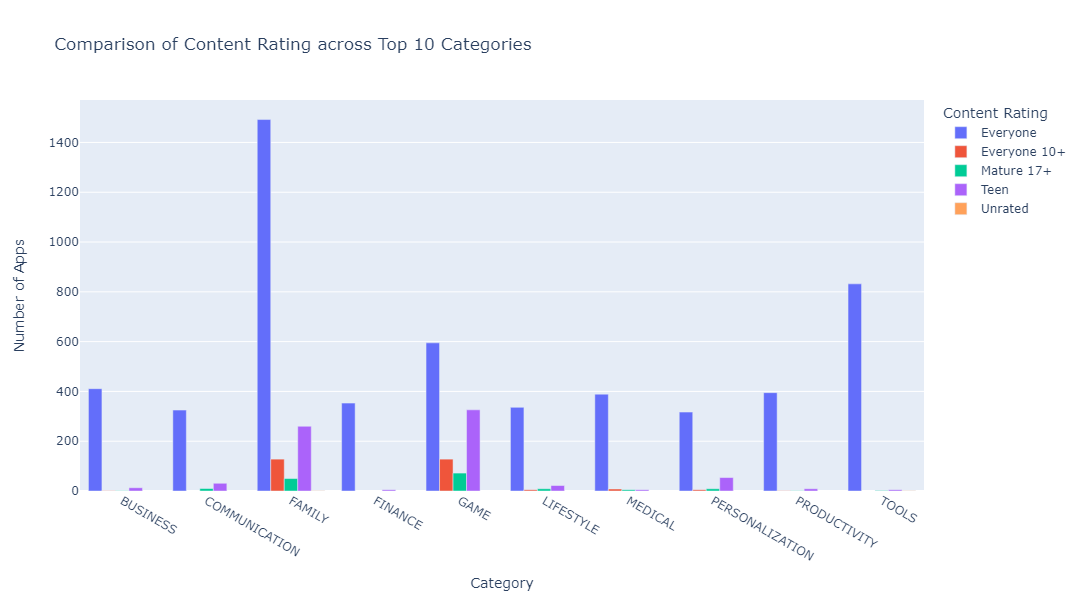

In [41]:

# Create a dataframe for content rating analysis
content_rating_analysis = apps.groupby(['Content Rating', 'Category']).size().reset_index(name='Count')

# Get the top 10 categories by total number of apps
top_categories = apps['Category'].value_counts().nlargest(10).index

# Filter the dataframe to include only the top 10 categories
content_rating_analysis_top = content_rating_analysis[content_rating_analysis['Category'].isin(top_categories)]

# Create a bar plot to compare Content Rating across top 10 Categories
fig = px.bar(content_rating_analysis_top, 
             x='Category', 
             y='Count', 
             color='Content Rating',
             title='Comparison of Content Rating across Top 10 Categories',
             labels={'Count': 'Number of Apps'},
             barmode='group',
             height=600)

# Update layout for better readability
fig.update_layout(xaxis_title='Category',
                  yaxis_title='Number of Apps',
                  legend_title='Content Rating')

# Show the plot
fig.show()


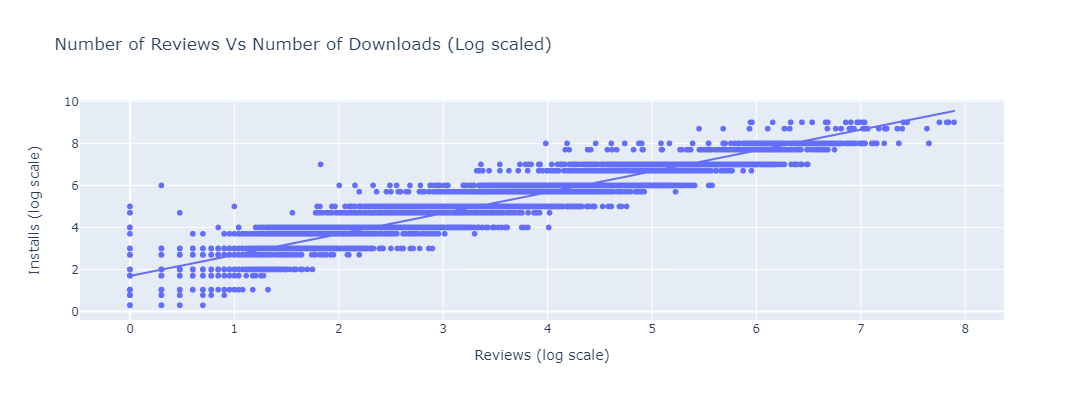

In [42]:

# Add a small constant to avoid log(0)
apps['Reviews_log'] = np.log10(apps['Reviews'] + 1)
apps['Installs_log'] = np.log10(apps['Installs'] + 1)

# Create a scatter plot with log transformed values
fig = px.scatter(apps, x='Reviews_log', y='Installs_log', trendline='ols',
                 title='Number of Reviews Vs Number of Downloads (Log scaled)',
                 labels={'Reviews_log': 'Reviews (log scale)', 'Installs_log': 'Installs (log scale)'})

fig.update_layout(width=600, height=400)

# Show the plot
fig.show()


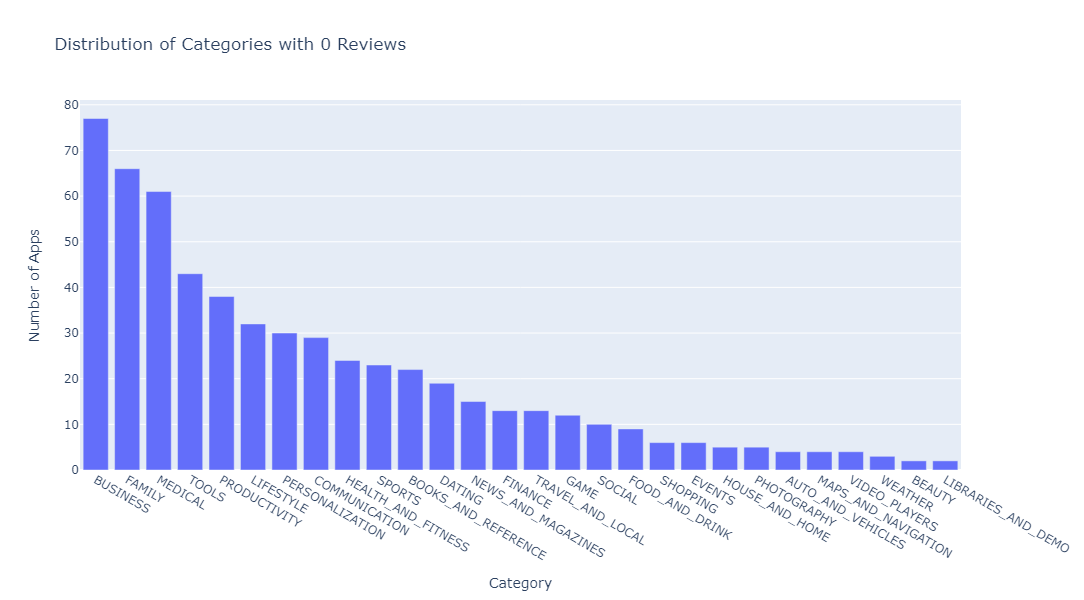

In [43]:

# Filter the dataframe to include only apps with 0 reviews
zero_reviews_apps = apps[apps['Reviews'] == 0]

# Create a dataframe for the distribution of categories with 0 reviews
zero_reviews_distribution = zero_reviews_apps['Category'].value_counts().reset_index()
zero_reviews_distribution.columns = ['Category', 'Count']

# Create a bar plot to show the distribution of categories with 0 reviews
fig = px.bar(zero_reviews_distribution, 
             x='Category', 
             y='Count', 
             title='Distribution of Categories with 0 Reviews',
             labels={'Count': 'Number of Apps', 'Category': 'Category'},
             height=600)

# Update layout for better readability
fig.update_layout(xaxis_title='Category',
                  yaxis_title='Number of Apps',
                  legend_title='Category',
                  width=800, height=600)

# Show the plot
fig.show()


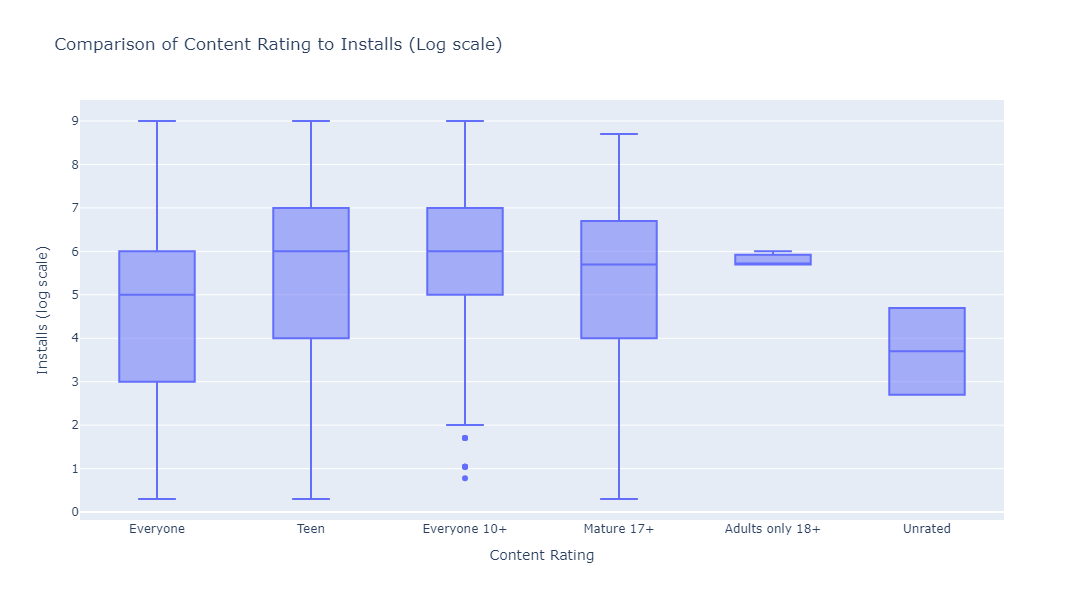

In [44]:

# Add a small constant to avoid log(0)
apps['Installs_log'] = np.log10(apps['Installs'] + 1)

# Create a box plot to compare Content Rating to Installs with log scale
fig = px.box(apps, x='Content Rating', y='Installs_log',
             title='Comparison of Content Rating to Installs (Log scale)',
             labels={'Installs_log': 'Installs (log scale)', 'Content Rating': 'Content Rating'},
             height=600)

# Update layout for better readability
fig.update_layout(xaxis_title='Content Rating',
                  yaxis_title='Installs (log scale)',
                  width=800, height=600)

# Show the plot
fig.show()


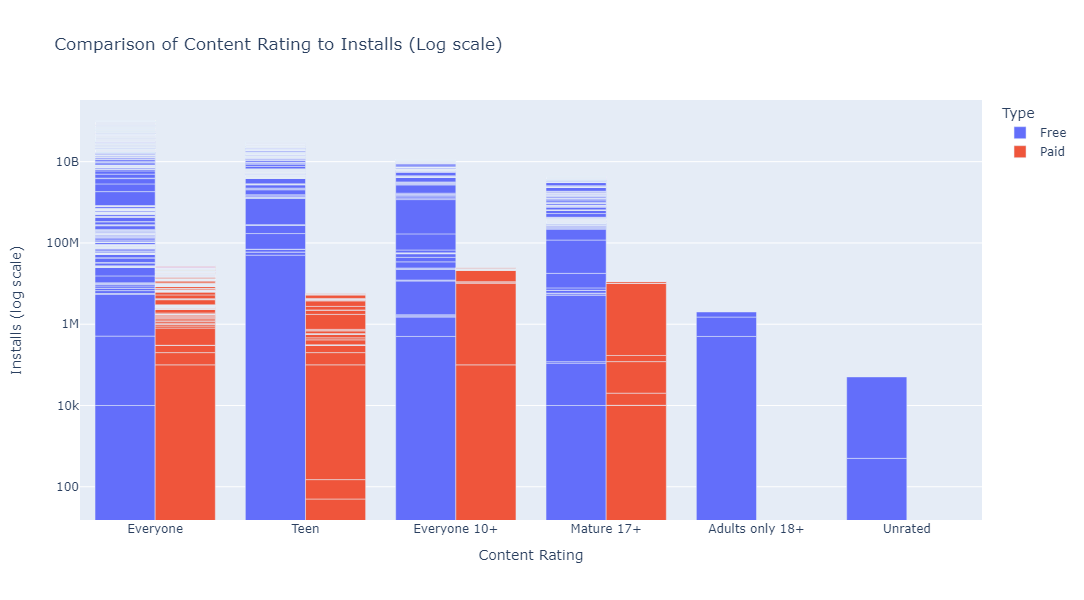

In [45]:

# Add a small constant to avoid log(0)
apps['Installs_log'] = np.log10(apps['Installs'] + 1)

# Create a bar plot to compare Content Rating to Installs with log scale, separated by Type
fig = px.bar(apps, x='Content Rating', y='Installs', color='Type', barmode='group',
             title='Comparison of Content Rating to Installs (Log scale)',
             labels={'Installs': 'Installs', 'Content Rating': 'Content Rating'},
             height=600)

# Update layout for better readability and set y-axis to log scale
fig.update_layout(xaxis_title='Content Rating',
                  yaxis_title='Installs (log scale)',
                  yaxis_type='log',
                  width=800, height=600)

# Show the plot
fig.show()


<Axes: xlabel='Content Rating', ylabel='Installs'>

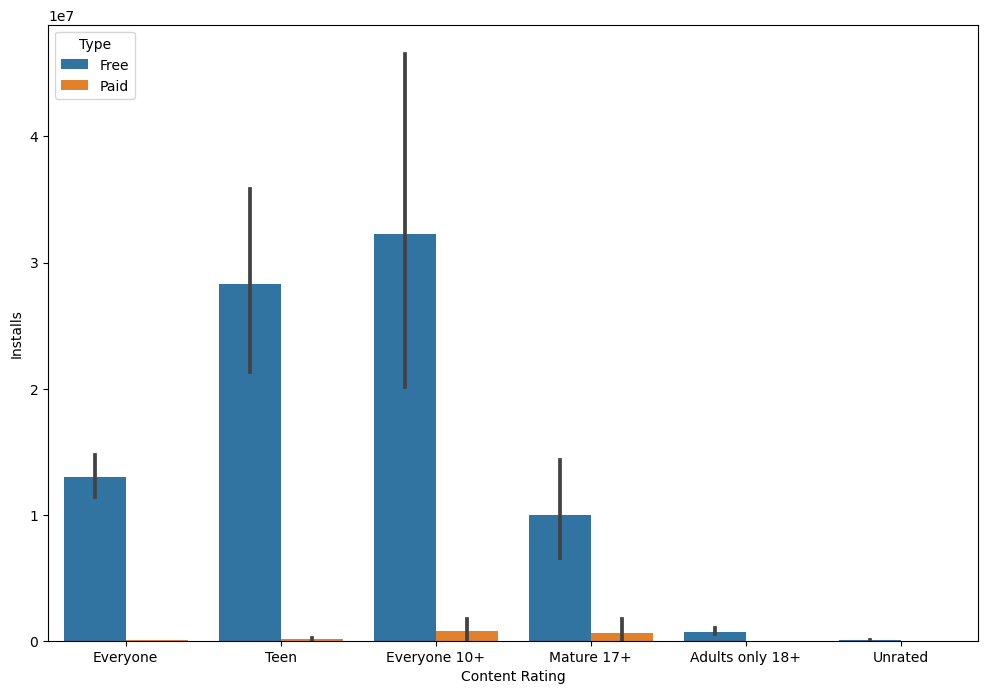

In [46]:
plt.figure(figsize=(12,8))
sns.barplot(x="Content Rating", y="Installs", hue="Type", data=apps)

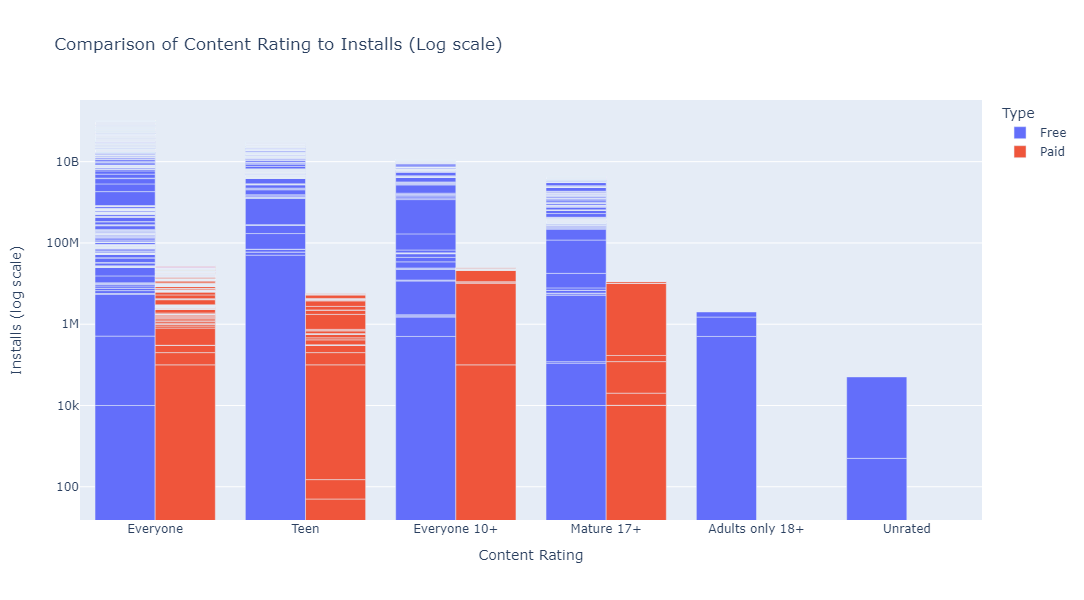

In [47]:

# Add a small constant to avoid log(0)
apps['Installs_log'] = np.log10(apps['Installs'] + 1)

# Create a bar plot to compare Content Rating to Installs with log scale, separated by Type
fig = px.bar(apps, x='Content Rating', y='Installs', color='Type', barmode='group',
             title='Comparison of Content Rating to Installs (Log scale)',
             labels={'Installs': 'Installs', 'Content Rating': 'Content Rating'},
             height=600)

# Update layout for better readability and set y-axis to log scale
fig.update_layout(xaxis_title='Content Rating',
                  yaxis_title='Installs (log scale)',
                  yaxis_type='log',
                  width=800, height=600)

# Show the plot
fig.show()
